# Long Term Deposit Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About

This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

The dataset contains various features that provide insights into customer attributes and campaign outcome

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes :**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## 1) Problem statement.

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if term deposit subscribed or not based on the given dataset.
* This can be used to Recommend a suitable profile for the customersrs for whom the should be subscribed or not subscribed based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is part of financial institute
* The data consists of 39998 Rows and 21 Columns

https://www.kaggle.com/datasets/

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv(r"bank-additional-full.csv")

**Show Top 5 Records**

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Shape of the dataset**

In [4]:
df.rename(columns={'y':'deposit'},inplace=True)

In [5]:
# Check if any column contains the value 'unknown'
columns_with_unknown = df.isin(['unknown']).any()

# Output the columns that contain 'Unknown'
unknown_columns = columns_with_unknown[columns_with_unknown].index.tolist()

print("Columns containing 'unknown':", unknown_columns)

Columns containing 'unknown': ['job', 'marital', 'education', 'default', 'housing', 'loan']


In [6]:
unknown_columns = ["job", "marital", "education", "default", "housing", "loan"]

# Loop through the columns and replace 'unknown' with the mode
for i in unknown_columns:
    mode_value = df[i].mode()[0]  # Calculate the mode of the column
    df[i] = df[i].replace('unknown', mode_value)  # Replace 'unknown' with mode

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(39998, 21)

**Summary of the dataset**

In [9]:
# Display summary statistics for a dataframe
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000
mean,39.975824,256.857368,2.586854,971.978574,0.144332,0.125374,93.554168,-40.461103,3.701892,5172.699912
std,10.198796,258.886226,2.798201,161.596705,0.421672,1.572646,0.572090,4.605056,1.694934,65.263990
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.000000,0.634000,4991.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,178.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,5.000000,1.400000,94.465000,-26.900000,5.045000,5228.100000


**Check Datatypes in the dataset**

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39998 non-null  int64  
 1   job             39998 non-null  object 
 2   marital         39998 non-null  object 
 3   education       39998 non-null  object 
 4   default         39998 non-null  object 
 5   housing         39998 non-null  object 
 6   loan            39998 non-null  object 
 7   contact         39998 non-null  object 
 8   month           39998 non-null  object 
 9   day_of_week     39998 non-null  object 
 10  duration        39998 non-null  int64  
 11  campaign        39998 non-null  int64  
 12  pdays           39998 non-null  int64  
 13  previous        39998 non-null  int64  
 14  poutcome        39998 non-null  object 
 15  emp_var_rate    39998 non-null  float64
 16  cons_price_idx  39998 non-null  float64
 17  cons_conf_idx   39998 non-null 

## 3. EXPLORING DATA

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

We have 11 categorical features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


In [12]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

job
admin.           25.918796
blue-collar      22.966148
technician       16.383319
services          9.740487
management        7.142857
retired           3.892695
entrepreneur      3.600180
self-employed     3.487674
housemaid         2.575129
unemployed        2.425121
student           1.867593
Name: proportion, dtype: float64
---------------------------
marital
married     61.118056
single      27.666383
divorced    11.215561
Name: proportion, dtype: float64
---------------------------
education
university.degree      33.406670
high.school            23.118656
basic.9y               14.935747
professional.course    12.668133
basic.4y               10.143007
basic.6y                5.682784
illiterate              0.045002
Name: proportion, dtype: float64
---------------------------
default
no     99.9925
yes     0.0075
Name: proportion, dtype: float64
---------------------------
housing
yes    54.710236
no     45.289764
Name: proportion, dtype: float64
---------------------------

**Insights**
 - We got the unknown category in each feature and we have to substitute it by most frequent elements from this features
 - `loan` and `default` columns are highly biased towards no. hence we can drop it.
 - `poutcome` has highly baised towards nonexistent.hence we have to fix the outliers

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

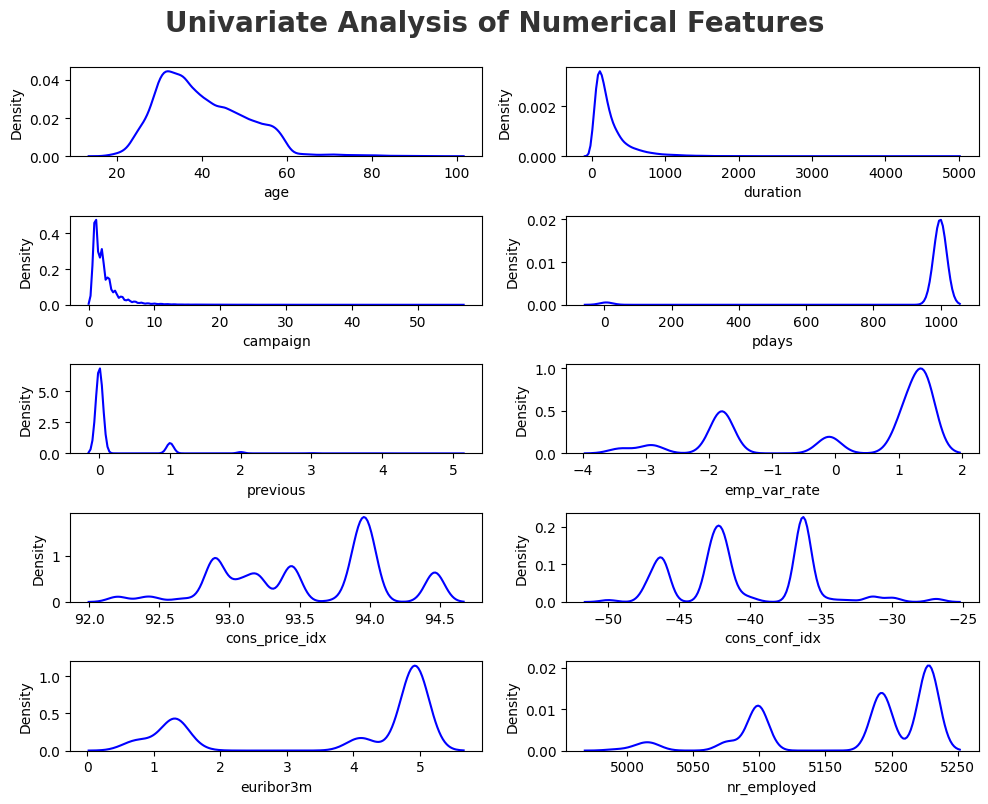

In [13]:
import math

n_features = len(numeric_features)
n_cols = 2  # For example, 2 columns
n_rows = math.ceil(n_features / n_cols)  # Dynamically calculate the number of rows

plt.figure(figsize=(10, 8))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(n_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])

plt.tight_layout()
plt.show()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insights**
 - `age` is right skewed distribution
 - `duration` and `compaign` are more skewed distribution, it may cause by outliers.
 - `pdays`, `previous`, `emp_var_rate`, `cons_price_idx`, `cons_conf_idx`, `nr_employed` are the discrete features.

### Categorical Features

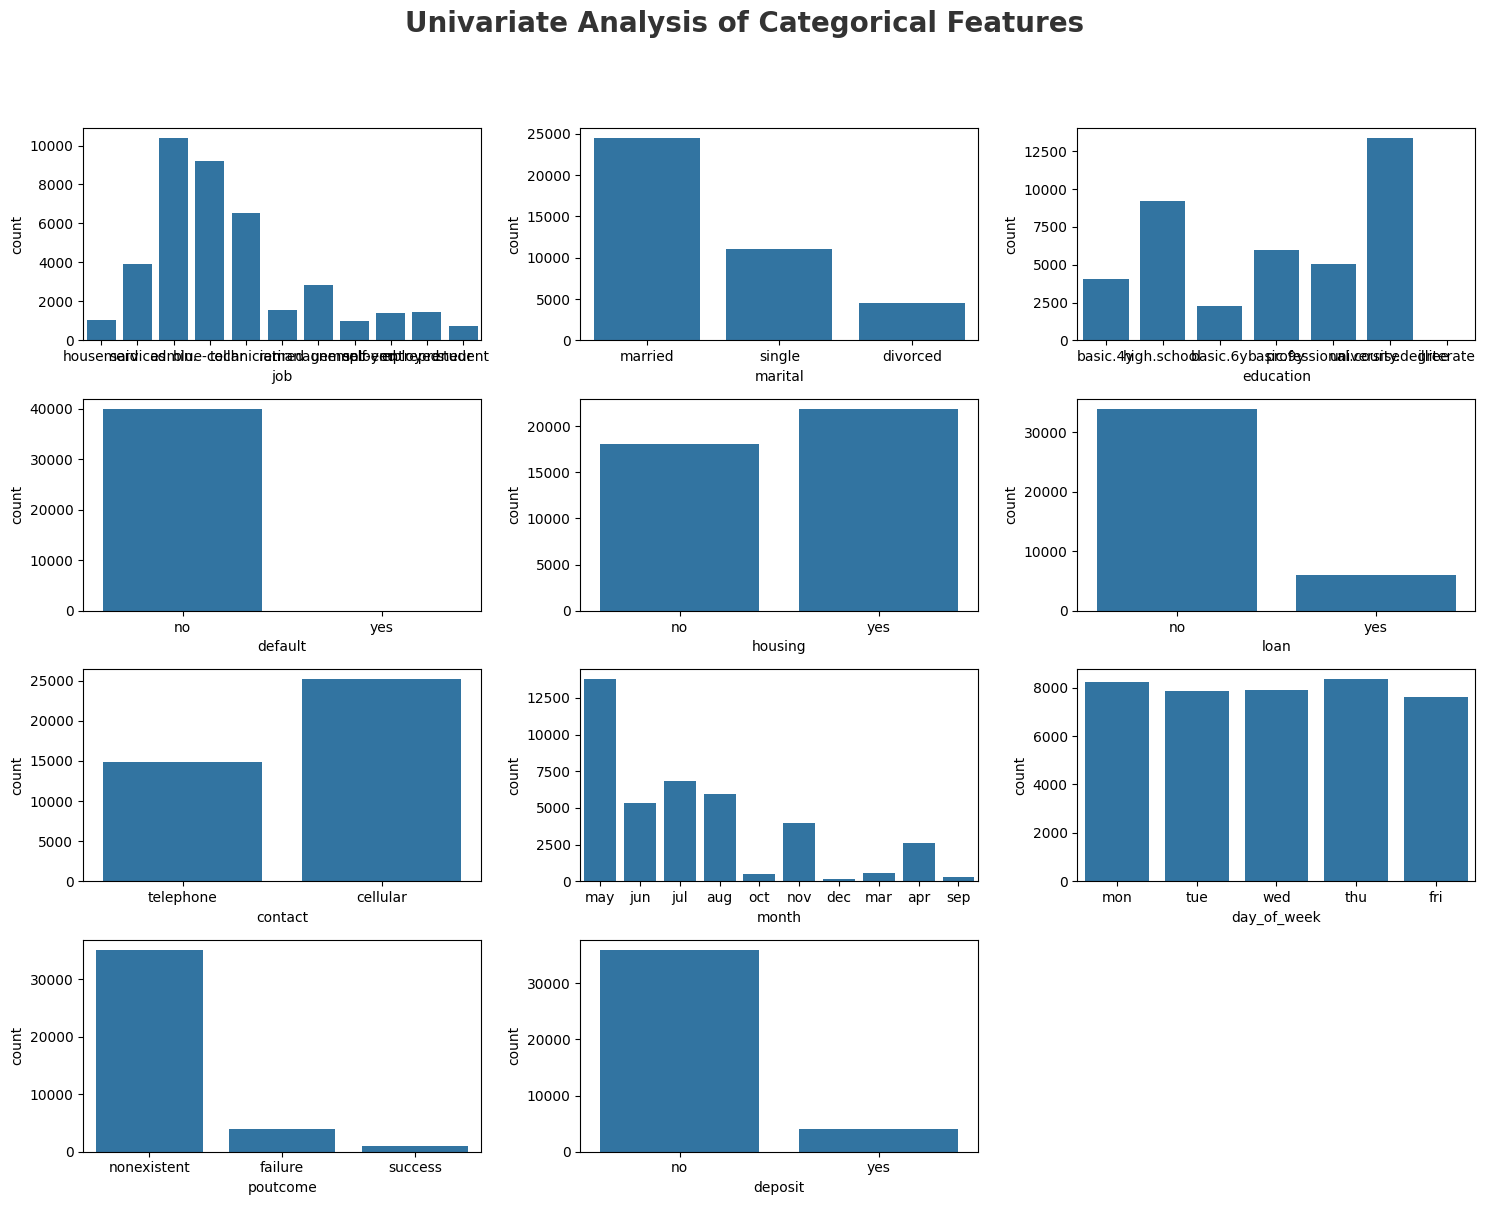

In [14]:
# categorical columns

import math

n_features = len(categorical_features)
n_cols = 3  # Set the number of columns
n_rows = math.ceil(n_features / n_cols)  # Dynamically calculate the number of rows

plt.figure(figsize=(15, n_rows *3 ))  # Adjust figure size based on rows
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, n_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
 - `default`, `loan`, `poutcome` coulmns have single category dominating.
 - In rest of the columns are balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Discrete and Continous Features

In [15]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 6 discrete features : ['pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'nr_employed']

We have 4 continuous_features : ['age', 'duration', 'campaign', 'euribor3m']


### Check Multicollinearity in Numerical features

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
cor=df[numeric_features].corr()
cor

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.004291,0.004769,-0.030380,0.016590,0.004416,-0.005267,0.139181,0.019338,-0.006753
duration,-0.004291,1.000000,-0.072390,-0.036129,0.009659,-0.023604,-0.001797,-0.006654,-0.025660,-0.034396
campaign,0.004769,-0.072390,1.000000,0.047714,-0.078695,0.147134,0.141104,-0.016921,0.129672,0.141697
pdays,-0.030380,-0.036129,0.047714,1.000000,-0.531839,0.266336,0.172007,-0.129731,0.265303,0.314450
previous,0.016590,0.009659,-0.078695,-0.531839,1.000000,-0.443501,-0.338350,-0.036149,-0.450708,-0.465871
emp_var_rate,0.004416,-0.023604,0.147134,0.266336,-0.443501,1.000000,0.841391,0.196859,0.977762,0.950986
cons_price_idx,-0.005267,-0.001797,0.141104,0.172007,-0.338350,0.841391,1.000000,0.086870,0.795201,0.716732
cons_conf_idx,0.139181,-0.006654,-0.016921,-0.129731,-0.036149,0.196859,0.086870,1.000000,0.280420,0.084929
euribor3m,0.019338,-0.025660,0.129672,0.265303,-0.450708,0.977762,0.795201,0.280420,1.000000,0.959903
nr_employed,-0.006753,-0.034396,0.141697,0.314450,-0.465871,0.950986,0.716732,0.084929,0.959903,1.000000


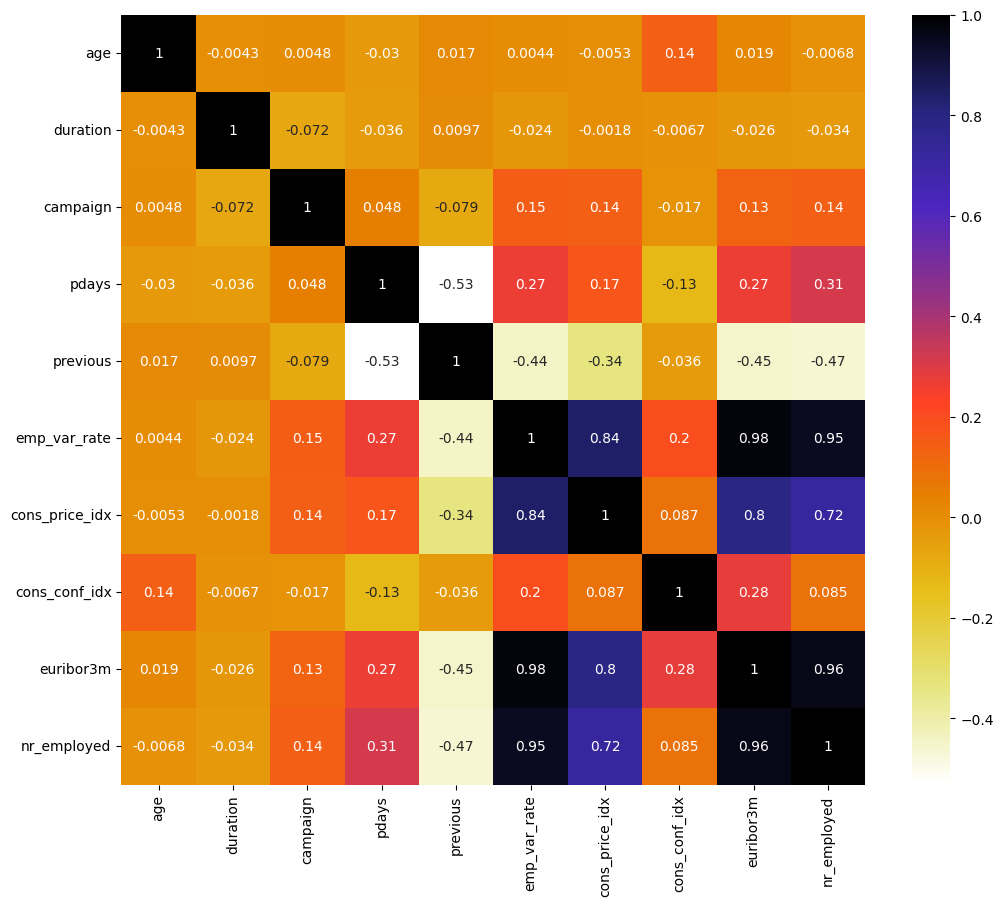

In [18]:
plt.figure(figsize=(12,10))
cor=df[numeric_features].corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute correlation value
                colname = corr_matrix.columns[i]  # Get the name of the column
                col_corr.add(colname)

    return col_corr

In [20]:
correlation(df[numeric_features], 0.7)

{'cons_price_idx', 'euribor3m', 'nr_employed'}

**Insights**
 - `cons_price_idx`, `euribor3m`, `nr_employed` and `emp_var_rate` features have strong correlation as we can see in heatmap so we have to drop `cons_price_idx`, `euribor3m`, `nr_employed` this feature and use only `emp_var_rate` feature for this project. 

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e deposit**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [101]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['deposit'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,job,Reject Null Hypothesis
1,marital,Reject Null Hypothesis
2,education,Reject Null Hypothesis
3,default,Fail to Reject Null Hypothesis
4,housing,Reject Null Hypothesis
5,loan,Fail to Reject Null Hypothesis
6,contact,Reject Null Hypothesis
7,month,Reject Null Hypothesis
8,day_of_week,Reject Null Hypothesis
9,poutcome,Reject Null Hypothesis


**Report** 
* Here `default` and `loan` fails to Rejects Null Hypothesis which means it doesn't correlate with target column. so we don't take this column for training machine learning model in this project.

### Checking Null Values

In [22]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
deposit           0
dtype: int64

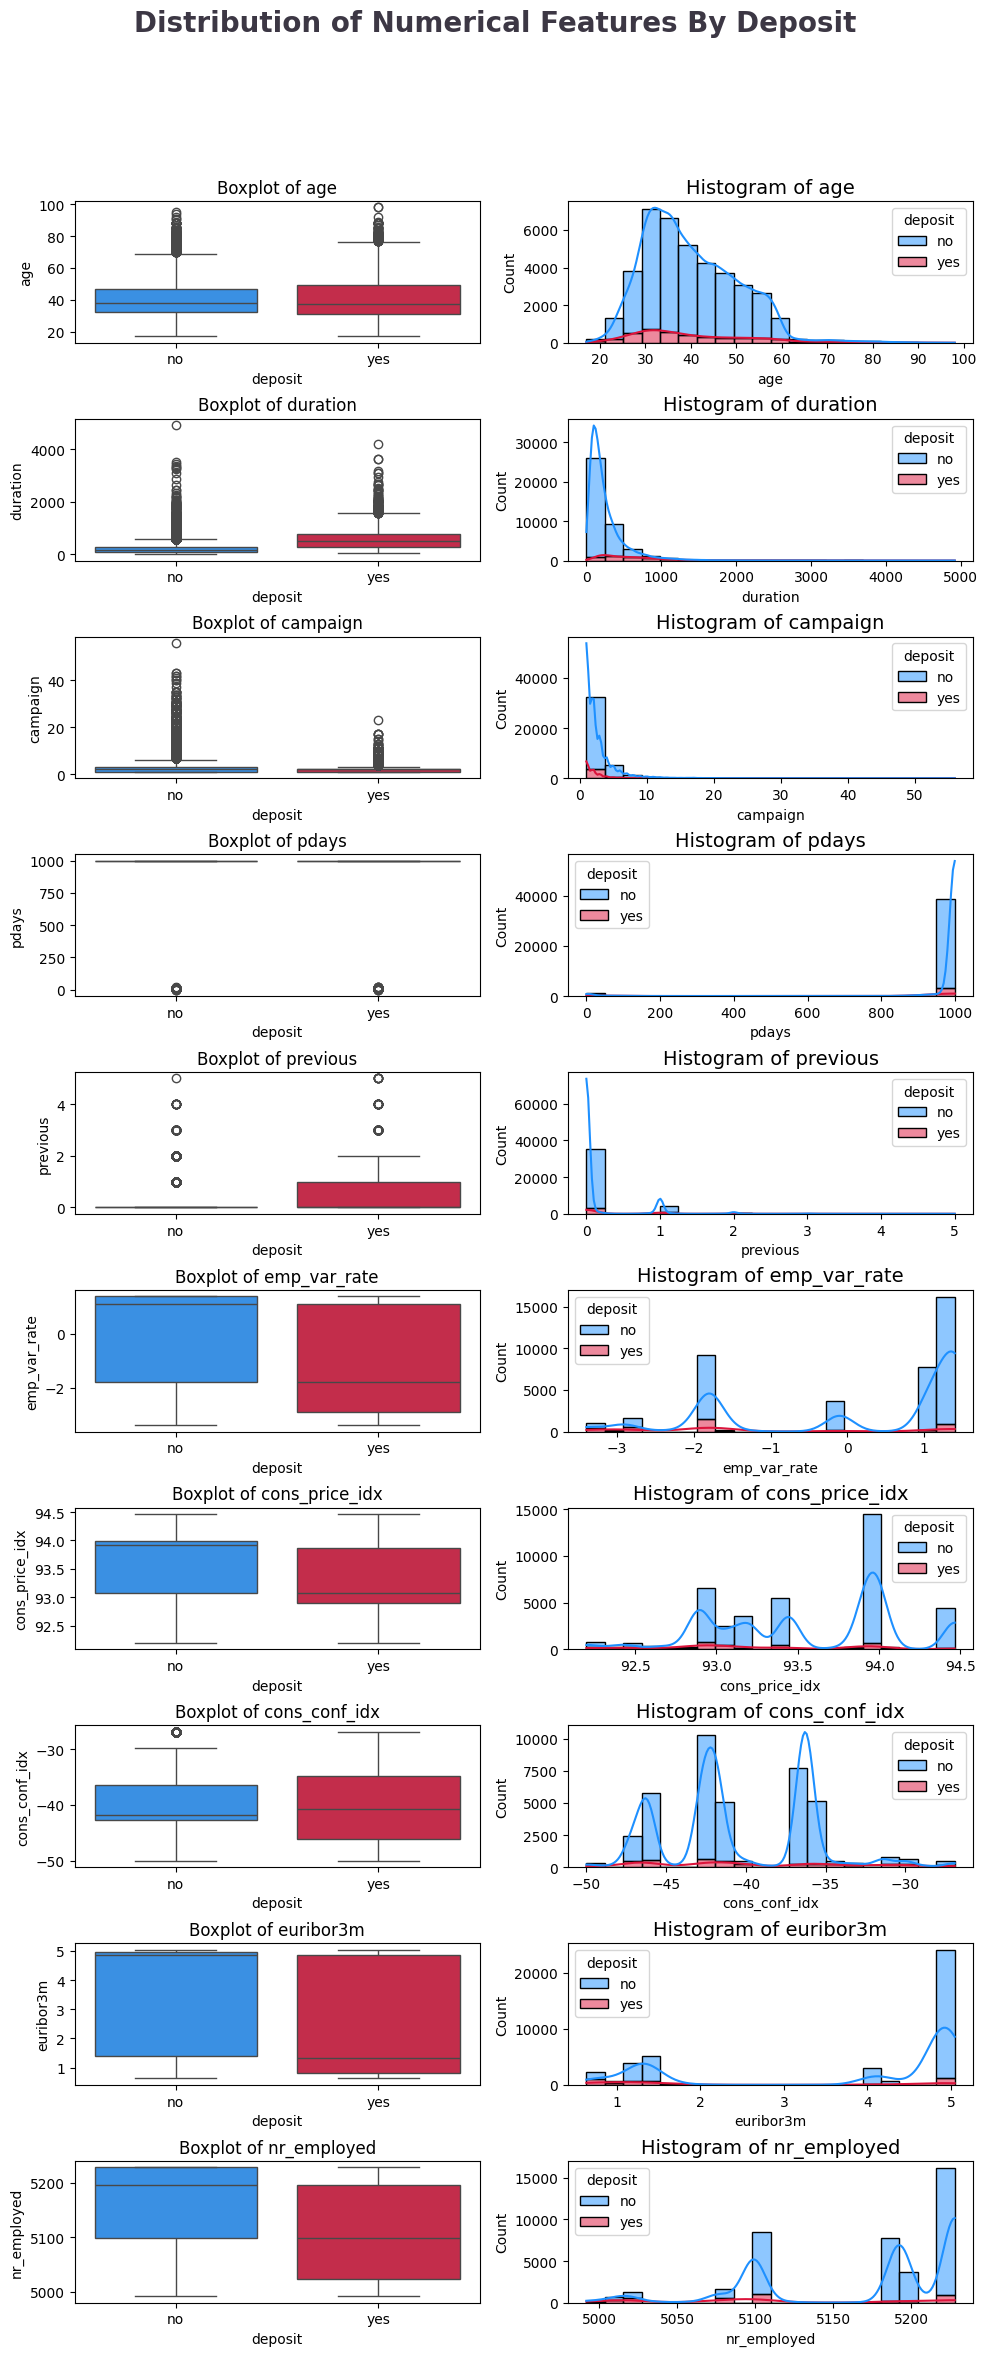

In [104]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(10, 2, figsize=(10,24))
fig.suptitle('Distribution of Numerical Features By Deposit', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numeric_features):   
    sns.boxplot(data=df, x='deposit', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='deposit', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

## Initial Analysis Report

* **`age`, `duration`, `campaign` have many outliers which can be Handled in Feature Engineering and `age`, `duration`, `campaign` is right skewed .**
* **`pdays` and `previuos` consist majorly only of a single value,their variance is quite less.**
* **`cons_conf_idx` is right skewed with outliers above upper bound of box plot.**
* **There are No missing values in the dataset.**
* **The `deposit` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

## 4. Visualization

### 4.1 Visualize the Target Feature

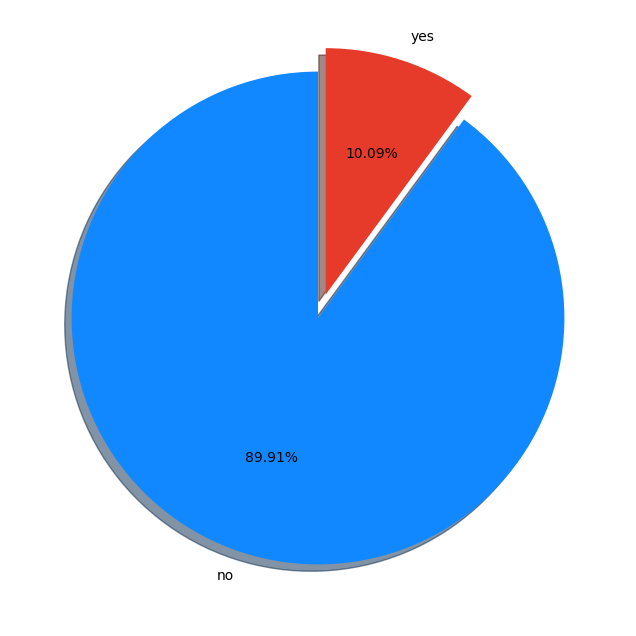

In [25]:
percentage = df.deposit.value_counts(normalize=True)*100
labels = ["no","yes"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the Target Variable is Imbalanced

**What is imbalanced data?**

- Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Unsubscribed value has more count than the Subscribed value of the dataset.

### 4.2 Does age has any impact on long term subscription ?

In [26]:
df.groupby('age').deposit.value_counts()

age  deposit
17   no          3
     yes         2
18   no         14
     yes         9
19   no         19
                ..
92   no          1
     yes         1
94   no          1
95   no          1
98   yes         2
Name: count, Length: 150, dtype: int64

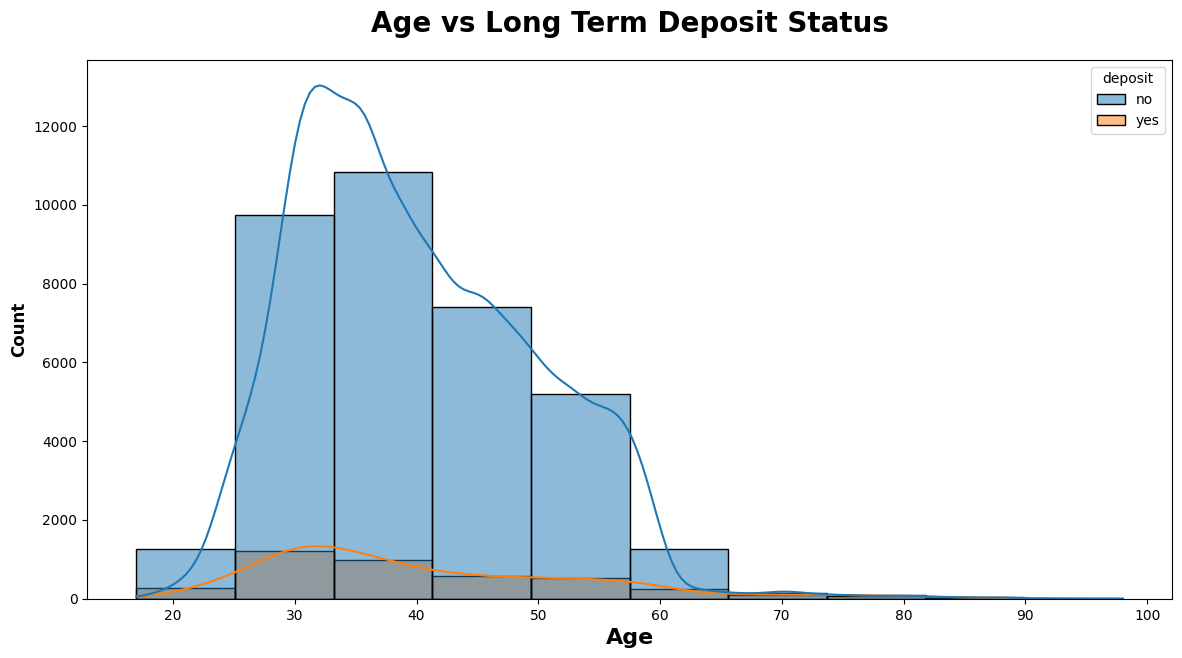

In [27]:
plt.subplots(figsize=(14,7))
sns.histplot(x="age",hue="deposit", bins=10, data=df, kde=True)
plt.title("Age vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Age", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

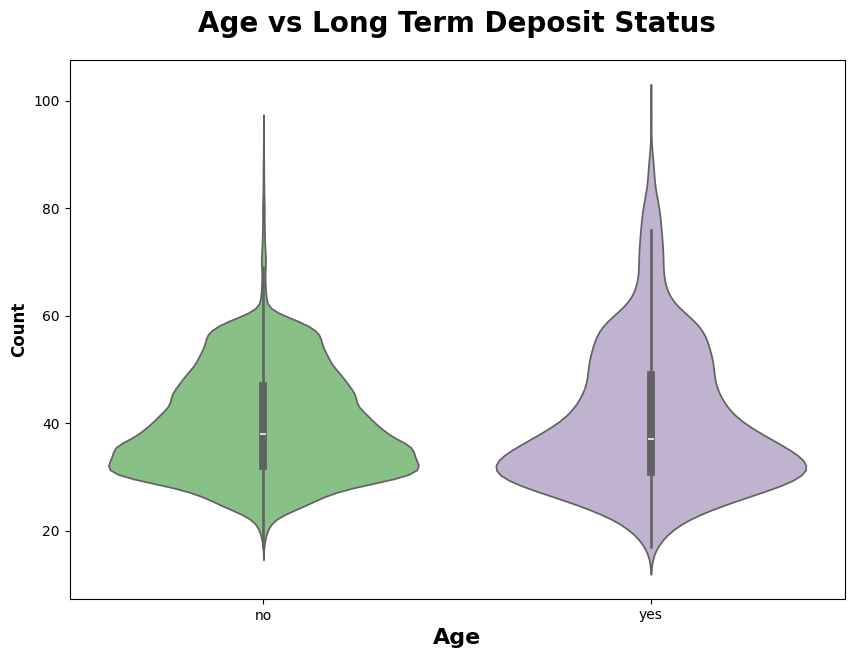

In [28]:
plt.subplots(figsize=(10,7))
sns.violinplot(x="deposit",y='age', data=df, palette="Accent")
plt.title("Age vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Age", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**insights :**

- The `age` feature shows a distinct distribution for ‘no’ and ‘yes’ deposit statuses. The median age for ‘no’ deposits is around 30 years, while for ‘yes’ deposits, it is around 40 years.

- This suggests that, on average, people who made a long-term deposit tend to be older.

### 4.3 Does customer job has any impact on long term subscription ? 

In [29]:
#group data by job and their count of deposits
df.groupby('job')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
job           deposit            
admin.        no        88.501977
              yes       11.498023
blue-collar   no        93.403005
              yes        6.596995
entrepreneur  no        91.875000
              yes        8.125000
housemaid     no        91.067961
              yes        8.932039
management    no        89.779489
              yes       10.220511
retired       no        77.906230
              yes       22.093770
self-employed no        89.820789
              yes       10.179211
services      no        92.530801
              yes        7.469199
student       no        71.218206
              yes       28.781794
technician    no        90.492904
              yes        9.507096
unemployed    no        87.422680
              yes       12.577320

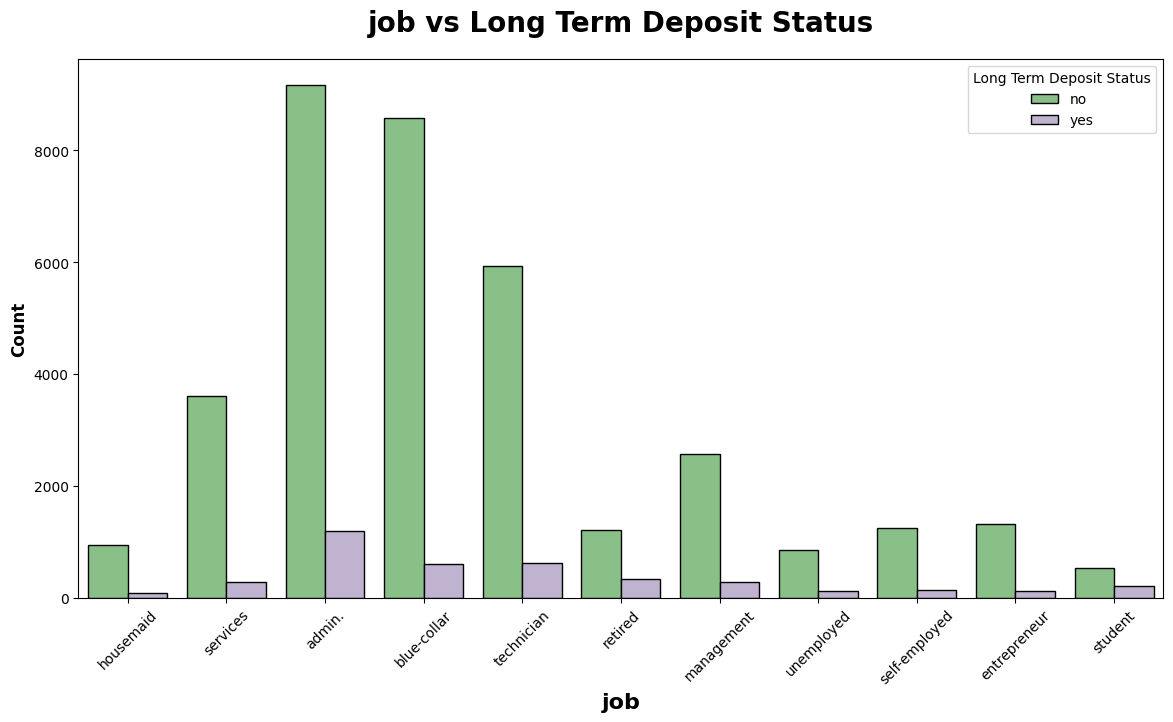

In [30]:
plt.subplots(figsize=(14,7))
sns.countplot(x="job",hue="deposit", data=df, ec = "black",palette="Accent")
plt.title("job vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("job", weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

In [31]:
df2 = df.copy()

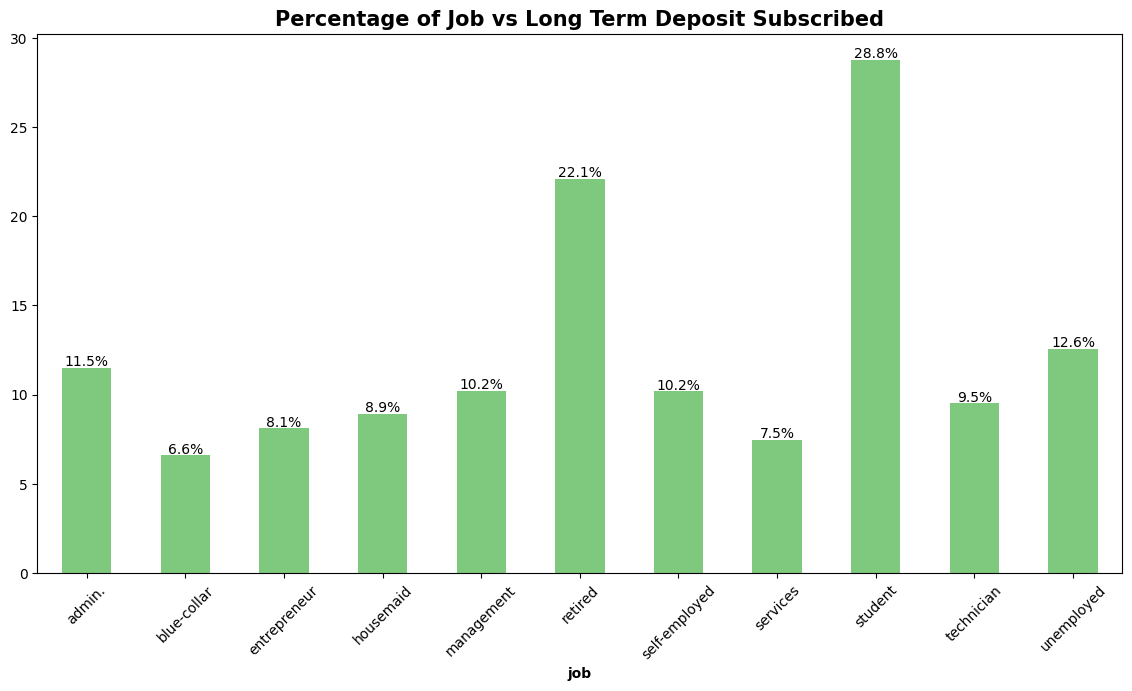

In [32]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['job'].value_counts()/df2['job'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Job vs Long Term Deposit Subscribed" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['job'].value_counts()/df2['job'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('job' , fontweight ='bold')
plt.xticks(rotation=45)
plt.show()

**Report**
- From the above chart of `job` we see that customers who have students has slightly high subscription rate than others.
- Apart from students, admin and retired customers have slightly high subscription rate
- Here we say that if the costumer are sstudent,admin and retired then the rate subscription will increase.

### 4.3 Does customer marital status has any impact on Long Term subscription ?

In [33]:
#group data by Education and their count of case_status
df.groupby('marital')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
marital  deposit            
divorced no        90.882746
         yes        9.117254
married  no        90.849219
         yes        9.150781
single   no        87.439002
         yes       12.560998

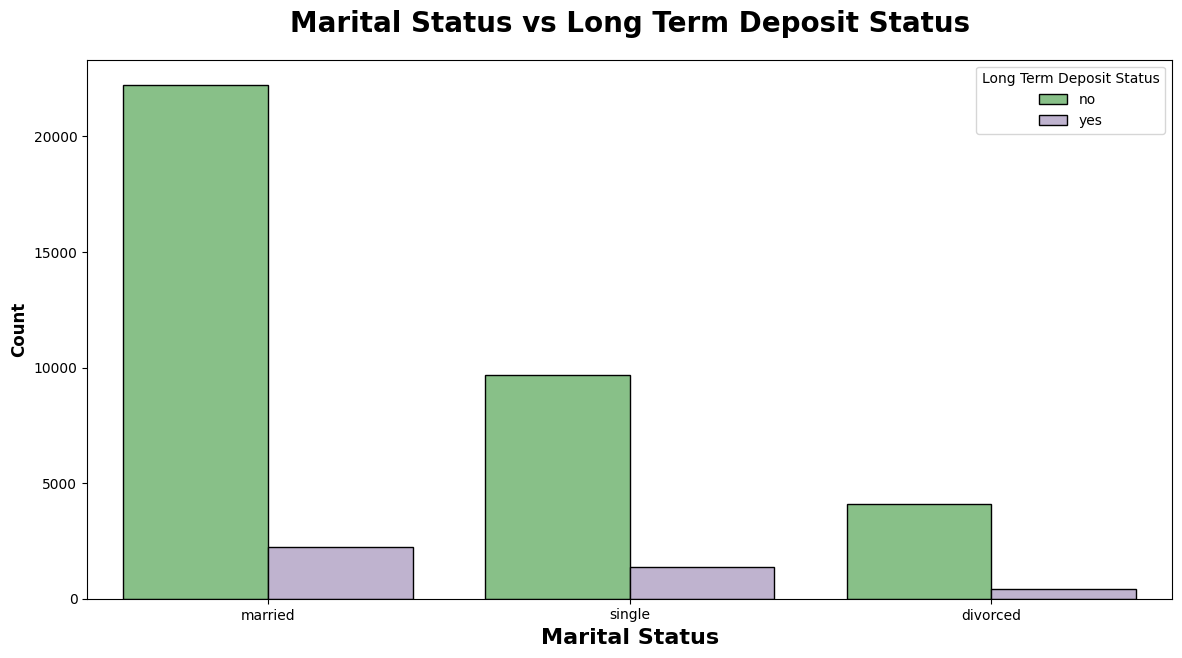

In [34]:
plt.subplots(figsize=(14,7))
sns.countplot(x="marital",hue="deposit", data=df, ec = "black",palette="Accent")
plt.title("Marital Status vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Marital Status", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

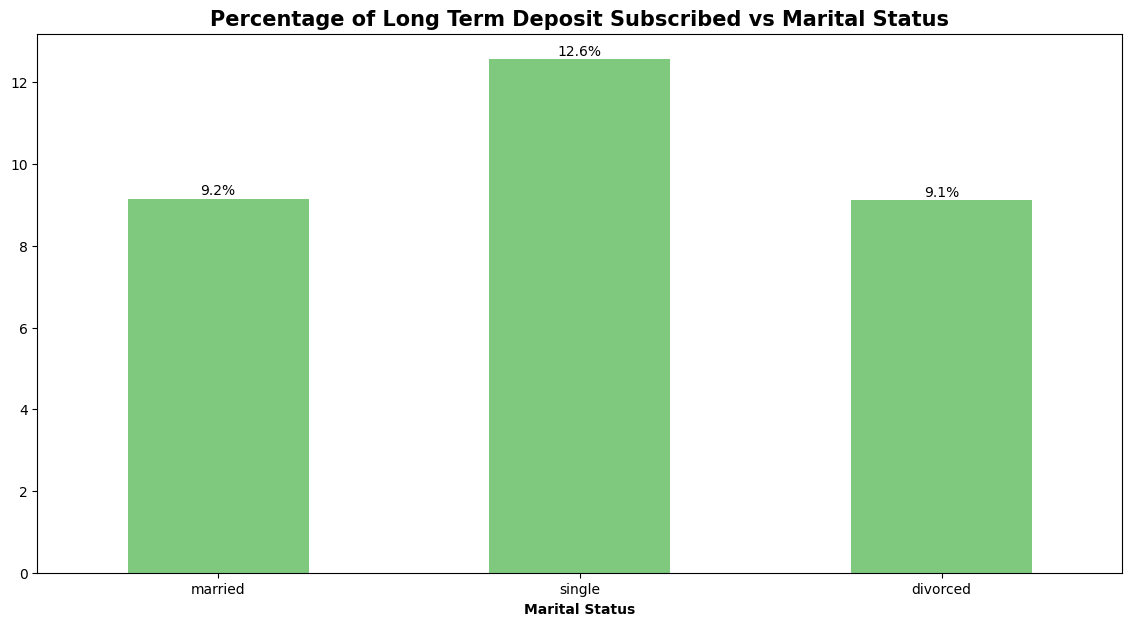

In [35]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['marital'].value_counts()/df2['marital'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Marital Status" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['marital'].value_counts()/df2['marital'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Marital Status' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- From the above chart of `marital` we see that  single customers has slightly high subscription rate than  married and divorced
- Here we say that if thecostumer are single then the rate subscription will increase.

### 4.4 Does customer education has any impact on long term subscription ?

In [36]:
#group data by has_job_experience and count case_status
df.groupby('education')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
education           deposit            
basic.4y            no        90.929258
                    yes        9.070742
basic.6y            no        92.212934
                    yes        7.787066
basic.9y            no        92.668229
                    yes        7.331771
high.school         no        90.277928
                    yes        9.722072
illiterate          no        77.777778
                    yes       22.222222
professional.course no        90.171699
                    yes        9.828301
university.degree   no        87.636581
                    yes       12.363419

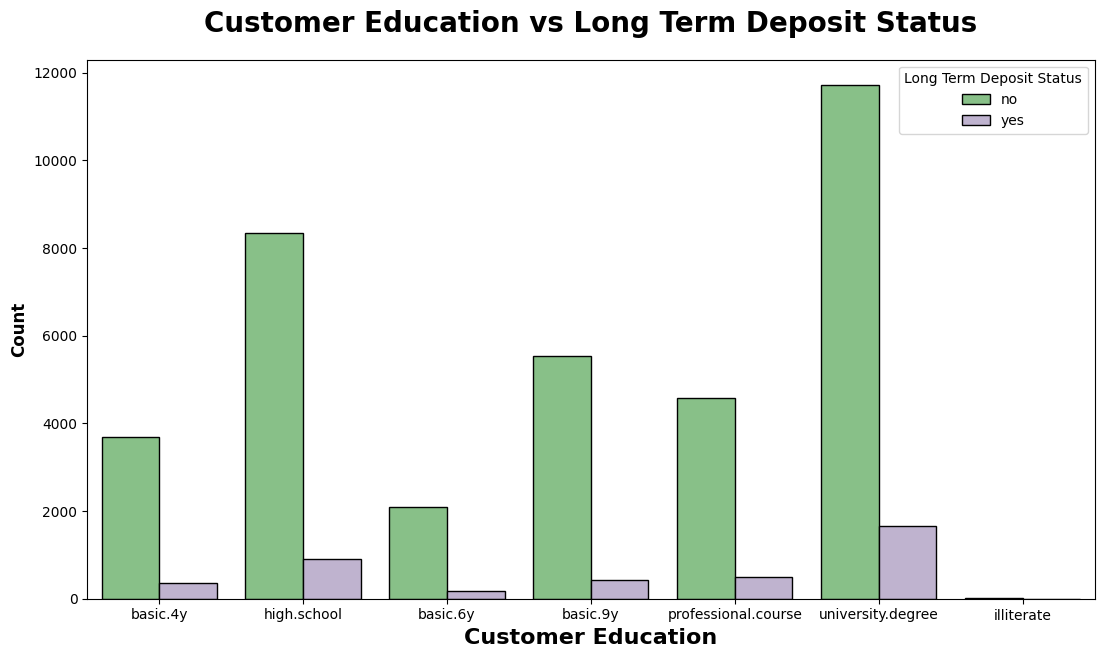

In [37]:
plt.subplots(figsize=(13,7))
sns.countplot(x="education",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Customer Education vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Customer Education", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

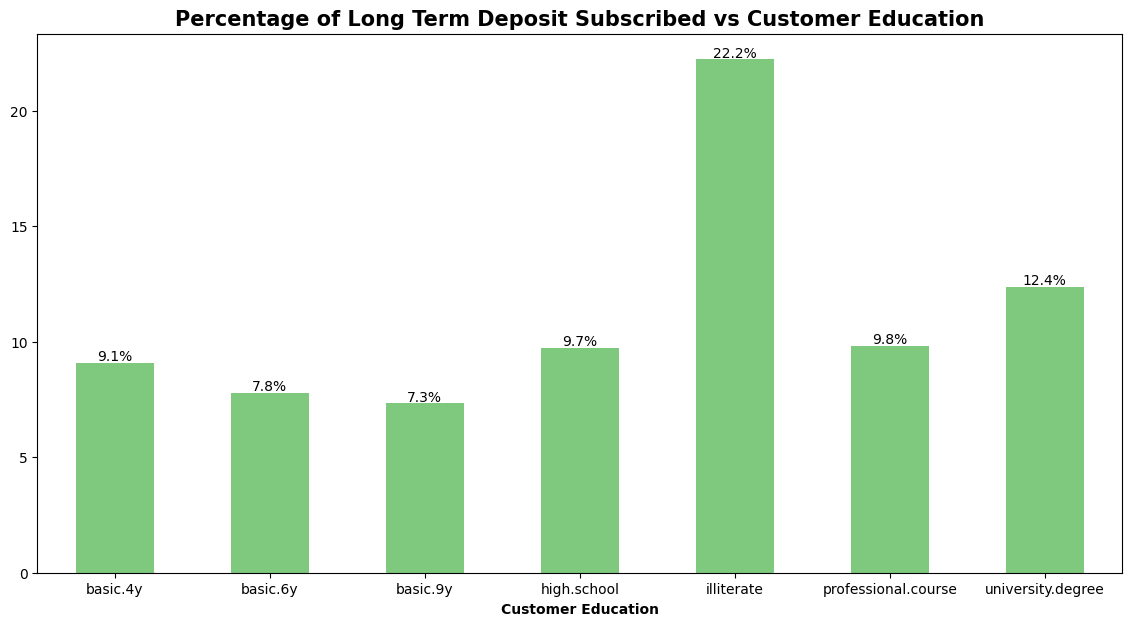

In [38]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['education'].value_counts()/df2['education'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Customer Education" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['education'].value_counts()/df2['education'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Customer Education' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- From the above chart of `education` we see that which customers are illiterate have high subscription rate than  others.
- Apart from illiterate all the customer who have education are likely similar.
- Here we say that if the costumer is illiterate then the rate subscription will increase.

### 4.5 If the Employee requires job training, does it make any impact on visa status?

In [39]:
#group data by requires_job_training and count case_status
df.groupby('default')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
default deposit            
no      no        89.908739
        yes       10.091261
yes     no       100.000000

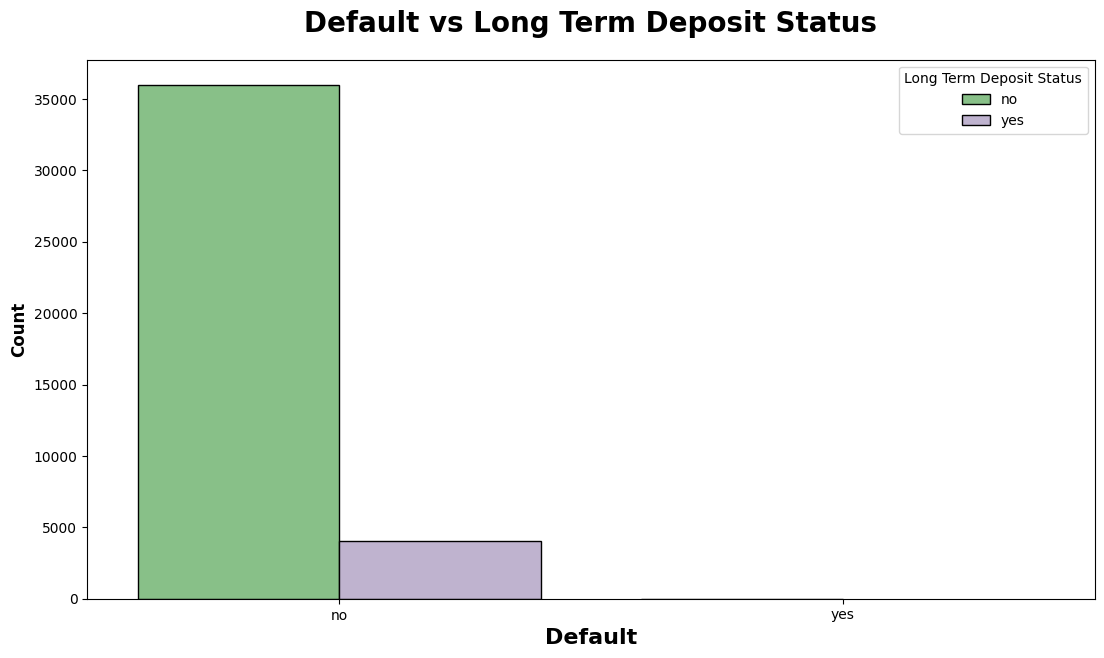

In [40]:
plt.subplots(figsize=(13,7))
sns.countplot(x="default",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Default vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Default", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


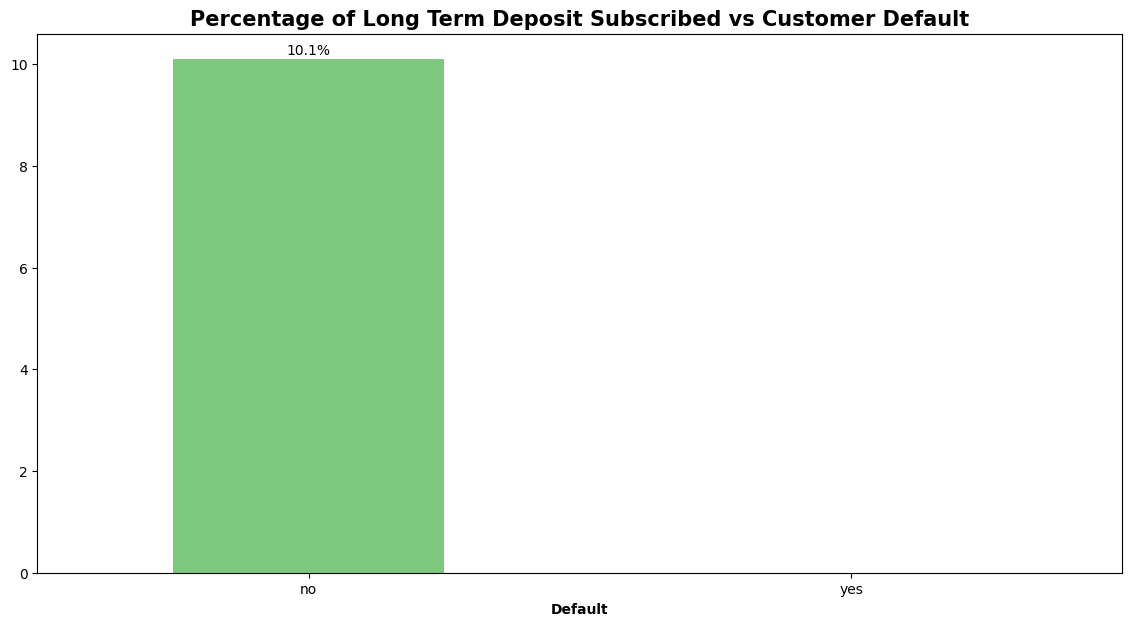

In [41]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['default'].value_counts()/df2['default'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Customer Default" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['default'].value_counts()/df2['default'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Default' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- From the above chart of `default` we see that customer has no default credit limit, this single category dominating.
- As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot

### 4.6 Does Housing of customer has any impact on long term subscription?

In [42]:
#group data by requires_job_training and count case_status
df.groupby('housing')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
housing deposit            
no      no        90.262214
        yes        9.737786
yes     no        89.617511
        yes       10.382489

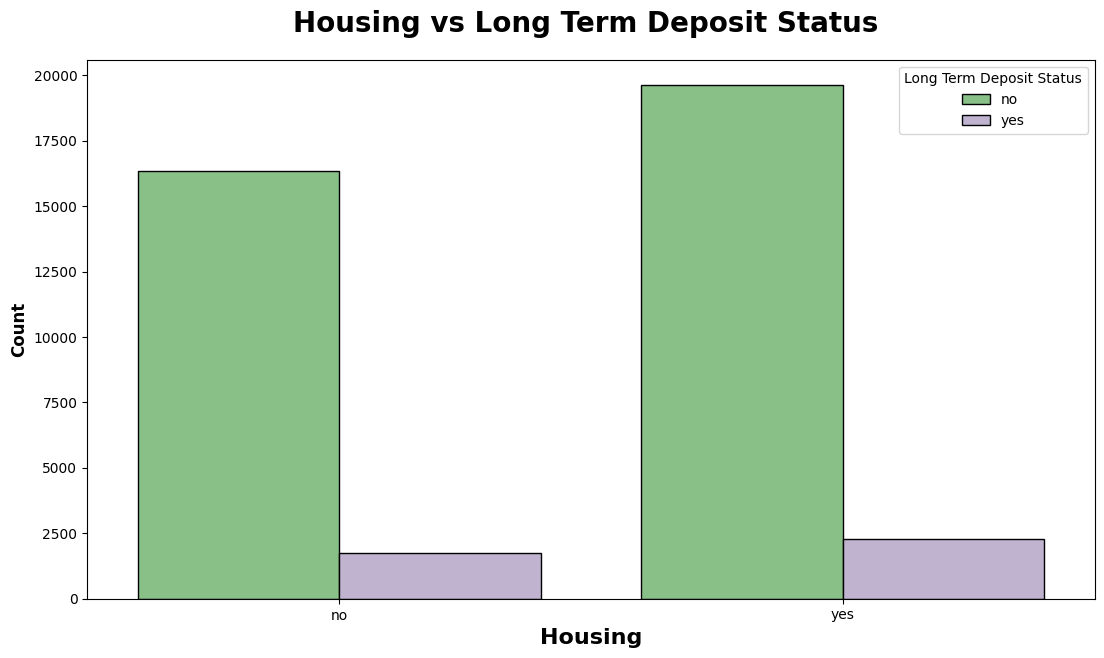

In [43]:
plt.subplots(figsize=(13,7))
sns.countplot(x="housing",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Housing vs Long Term Deposit Status ", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Housing", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

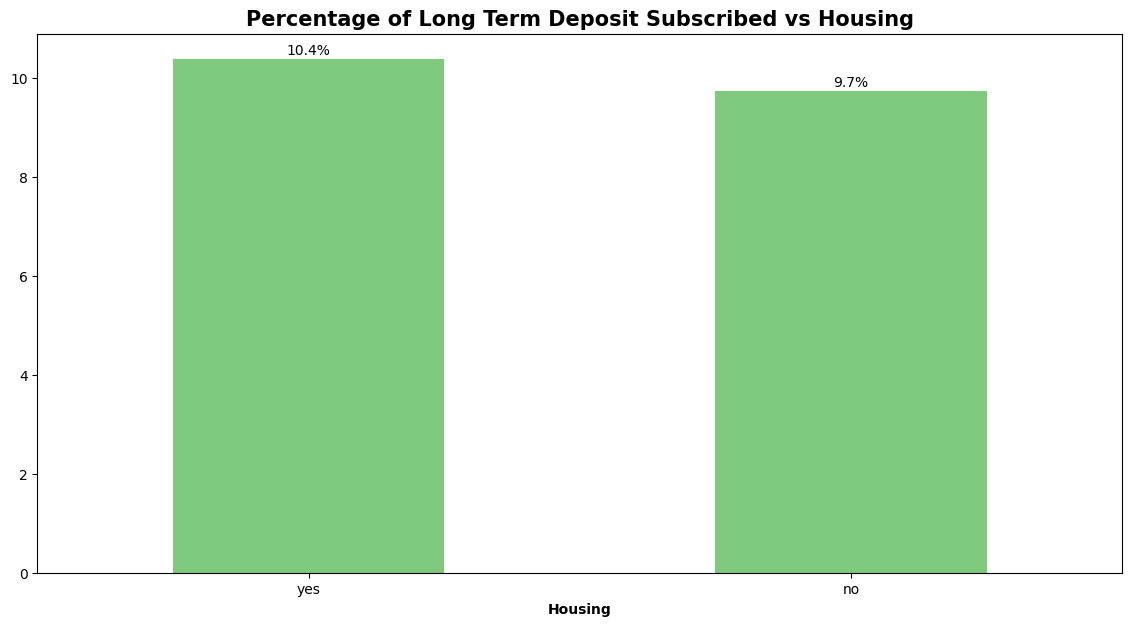

In [44]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['housing'].value_counts()/df2['housing'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Housing" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['housing'].value_counts()/df2['housing'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Housing' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- From the above chart of `housing` we see that customers have hoouse loan has slightly high subscription rate than  who don't have house loan.
- Here we say that if the costumers have house loan then the rate subscription will increase.

### 4.8 Does loan of customer has any impact on long term subscription ?

In [45]:
#group data by requires_job_training and count case_status
df.groupby('loan')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
loan deposit            
no   no        89.852295
     yes       10.147705
yes  no        90.228656
     yes        9.771344

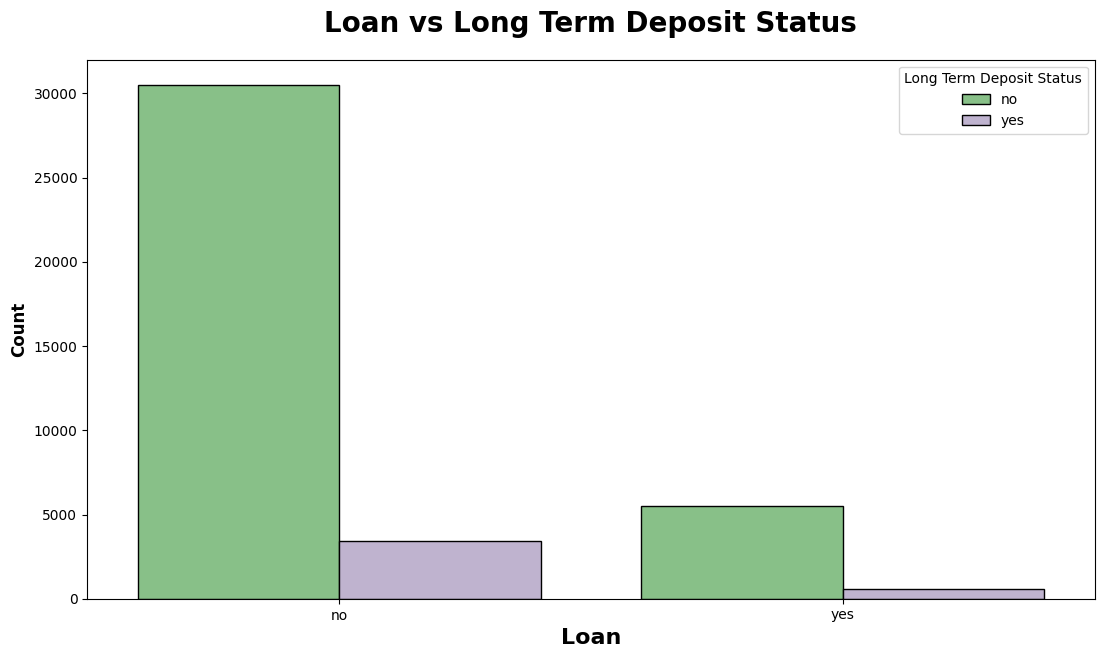

In [46]:
plt.subplots(figsize=(13,7))
sns.countplot(x="loan",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Loan vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Loan", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

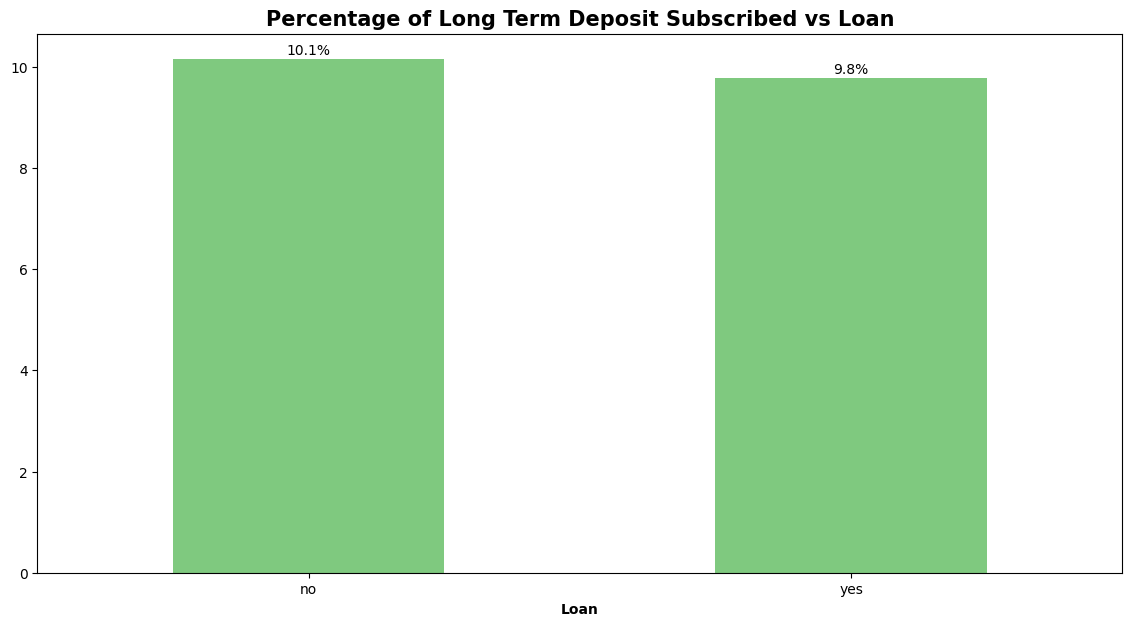

In [47]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['loan'].value_counts()/df2['loan'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Loan" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['loan'].value_counts()/df2['loan'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Loan' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**

- If customer has personal loan. it doesn't have any effect on long term deposit subscription.
- It shows the same distribution of subscribed and unsubscribed.
- As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot

### 4.9 Does contact of customer has any impact on long term subscription ?

In [48]:
#group data by requires_job_training and count case_status
df.groupby('contact')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
contact   deposit            
cellular  no        86.897291
          yes       13.102709
telephone no        95.026991
          yes        4.973009

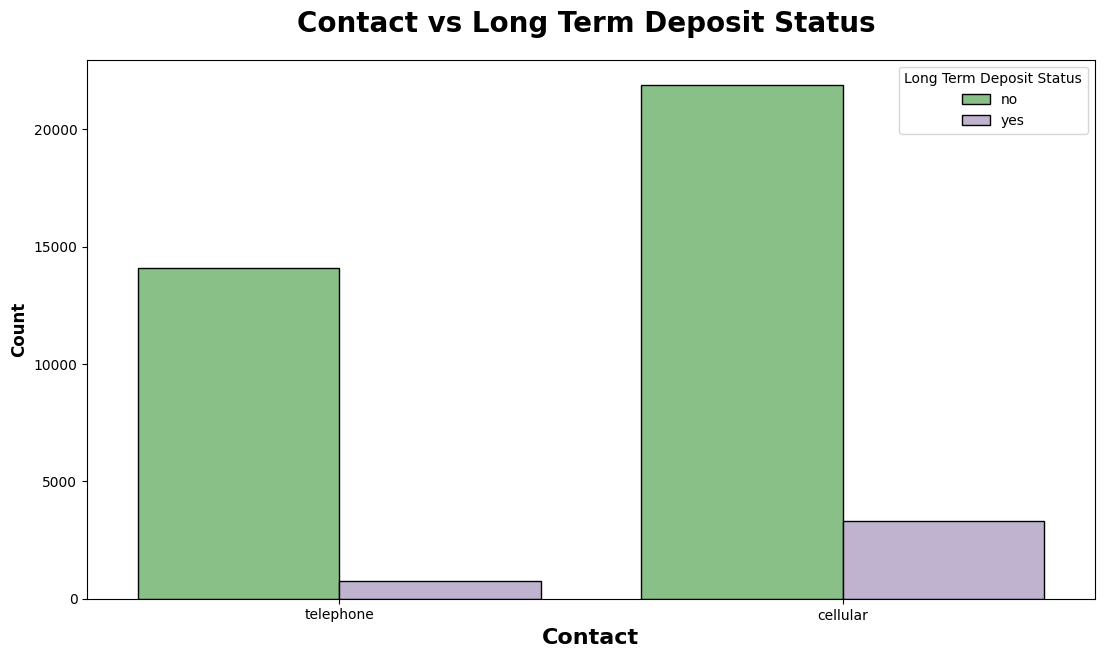

In [49]:
plt.subplots(figsize=(13,7))
sns.countplot(x="contact",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Contact vs Long Term Deposit Status ", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Contact", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

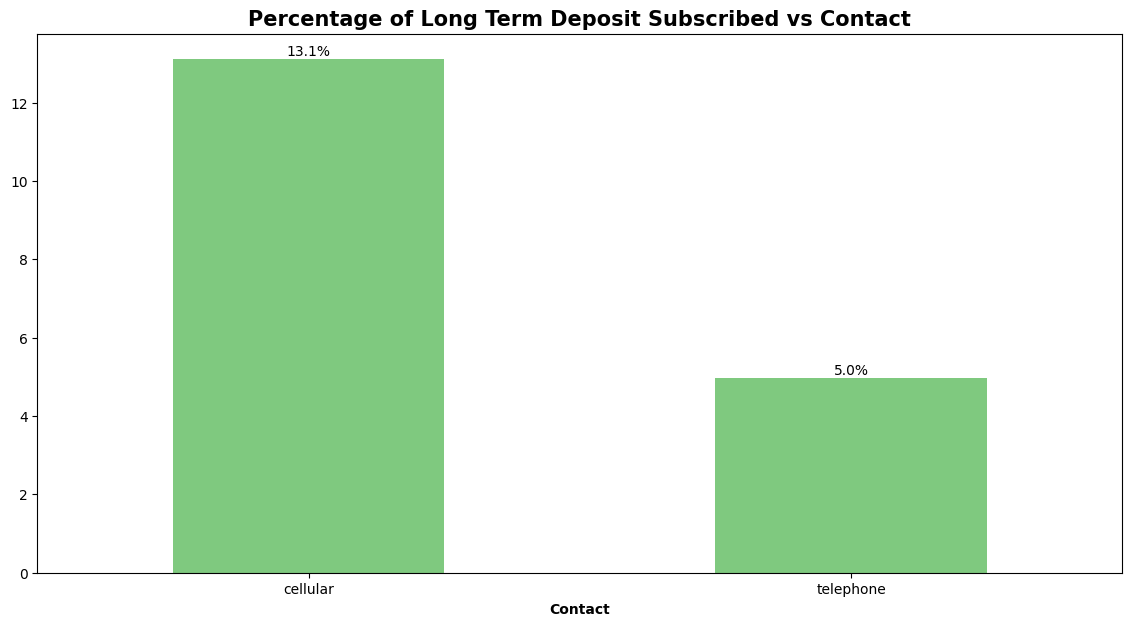

In [50]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['contact'].value_counts()/df2['contact'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Contact" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['contact'].value_counts()/df2['contact'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Contact' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- From the above chart of `housing` we see that percentage customers who contacted by cellular have have  high subscription rate than contacted by telephone.
- Here we say that if the costumers have contacted by cellular then the rate subscription will increase.

### 4.9 Does month has any impact on long term subscription ?

In [51]:
#group data by requires_job_training and count case_status
df.groupby('month')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
month deposit            
apr   no        79.521277
      yes       20.478723
aug   no        91.000841
      yes        8.999159
dec   no        51.098901
      yes       48.901099
jul   no        93.107970
      yes        6.892030
jun   no        89.598643
      yes       10.401357
mar   yes       50.549451
      no        49.450549
may   no        93.565255
      yes        6.434745
nov   no        90.989177
      yes        9.010823
oct   no        56.809339
      yes       43.190661
sep   no        60.299625
      yes       39.700375

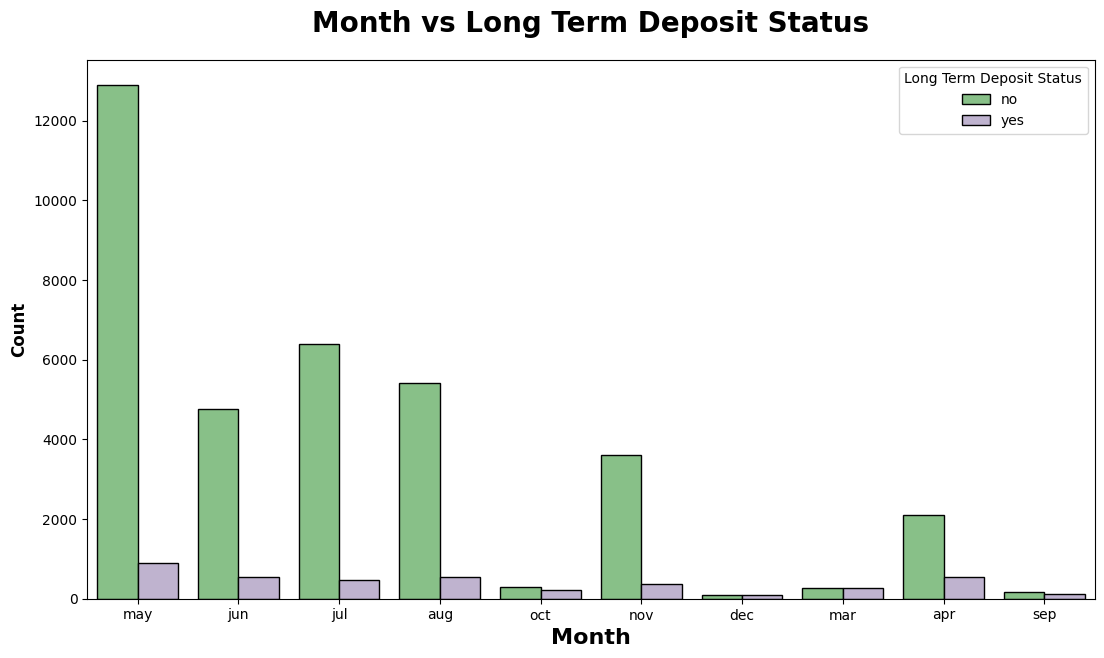

In [52]:
plt.subplots(figsize=(13,7))
sns.countplot(x="month",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Month vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Month", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

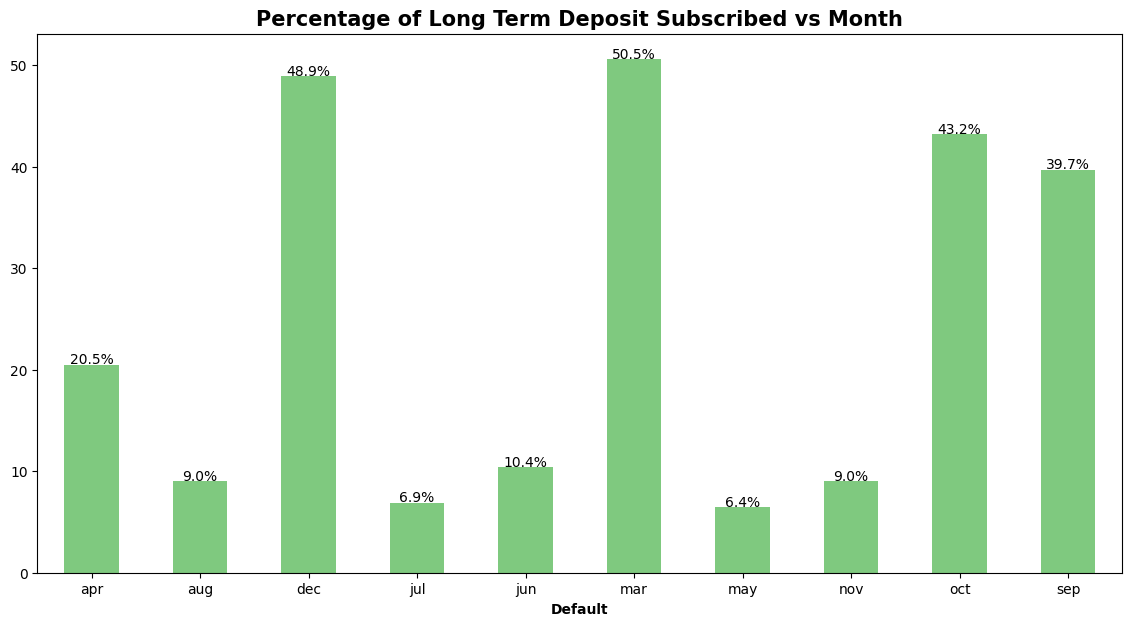

In [53]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['month'].value_counts()/df2['month'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Month" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['month'].value_counts()/df2['month'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Default' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- From the above chart of `housing` we see that percentage of customers subscribed in december,march,october,septeber has high subscription rate than others.
- Here we say that if the more customers subscribed in december,march,october,septeber months for long term deposit subscription.

### 4.10 Does day has any impact on long term subscription ?

In [54]:
#group data by requires_job_training and count case_status
df.groupby('day_of_week')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
day_of_week deposit            
fri         no        90.273038
            yes        9.726962
mon         no        90.877150
            yes        9.122850
thu         no        89.290848
            yes       10.709152
tue         no        89.350089
            yes       10.649911
wed         no        89.759494
            yes       10.240506

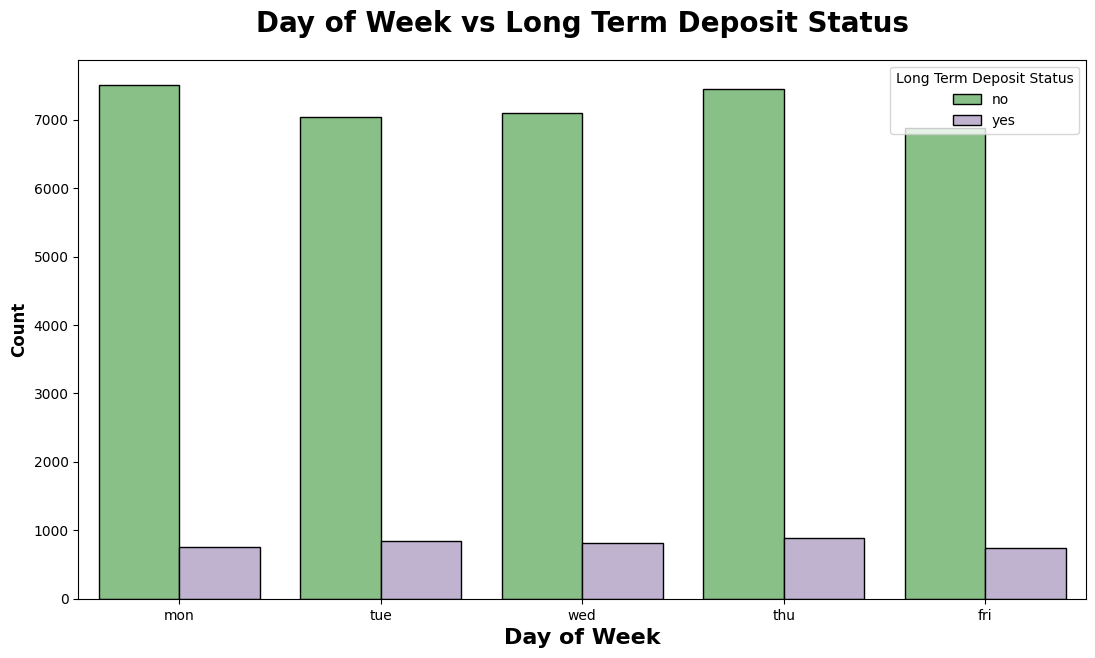

In [55]:
plt.subplots(figsize=(13,7))
sns.countplot(x="day_of_week",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Day of Week vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Day of Week", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

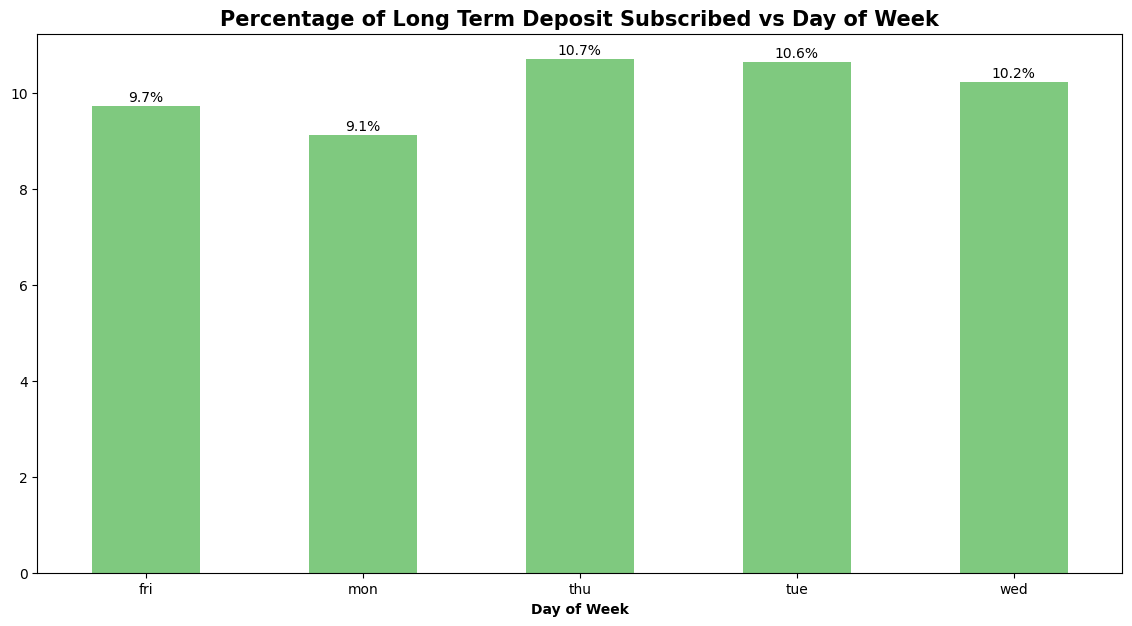

In [56]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['day_of_week'].value_counts()/df2['day_of_week'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Day of Week" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['day_of_week'].value_counts()/df2['day_of_week'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Day of Week' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- From the above chart of `day_of_week` we see that distribution of percentage customers  who subscribed in all week days has is slightly similar.
- so this feature is not much important.

### 4.11 Does duration has any impact on long term subscription ?

In [57]:
df.groupby('duration').deposit.value_counts()

duration  deposit
0         no         4
1         no         1
2         no         1
3         no         3
4         no         6
                    ..
3509      no         1
3631      yes        1
3643      yes        1
4199      yes        1
4918      no         1
Name: count, Length: 2543, dtype: int64

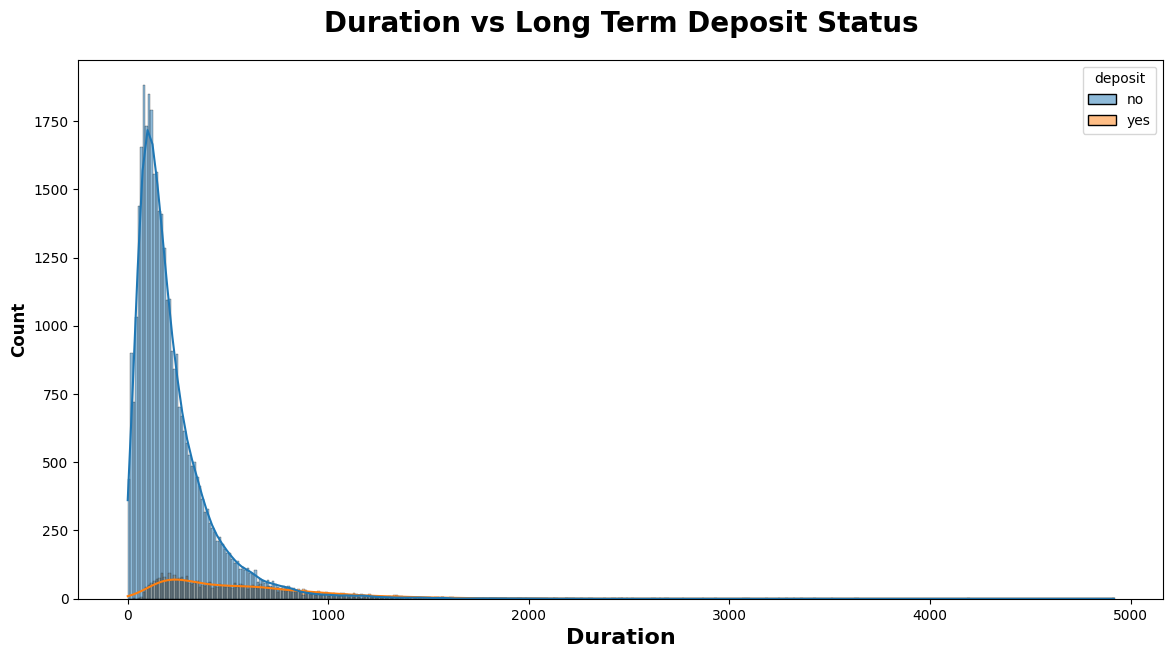

In [58]:
plt.subplots(figsize=(14,7))
sns.histplot(x="duration",hue="deposit", data=df, kde=True)
plt.title("Duration vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Duration", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights :**
- The `duration` appears to have a right skewed distribution, with single distinct peak between 0 to 1000. This suggests that most observations are concentrated in these ranges of contact duration values.
The deposits with "no" status are heavily represented in the peaks, particularly in the higher bin (between 0 to 1000), where there are a significantly large number of "no" deposits.

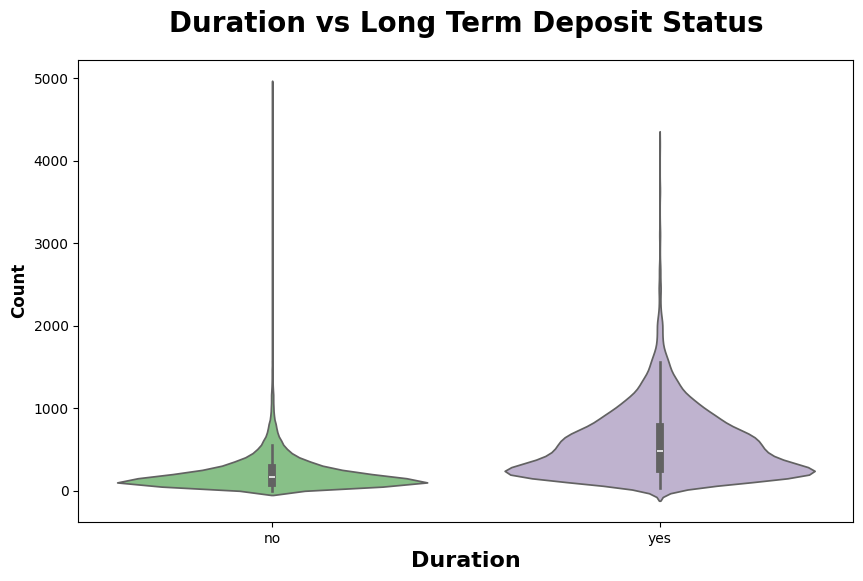

In [59]:
plt.subplots(figsize=(10,6))
sns.violinplot(x="deposit",y='duration', data=df, palette="Accent")
plt.title("Duration vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Duration", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**insights :**

- The `duration` feature shows a clear distinction between ‘no’ and ‘yes’ deposit statuses. The median duration for ‘no’ deposits is around 2000 seconds, while for ‘yes’ deposits, it is around 4000 seconds.
- This suggests that, on average, people who made a long-term deposit tend to have longer interaction durations.

### 4.12 Does campaign has any impact on long term subscription ?

In [60]:
df.groupby('campaign').deposit.value_counts()

campaign  deposit
1         no         15033
          yes         1993
2         no          9213
          yes         1044
3         no          4708
          yes          491
4         no          2367
          yes          225
5         no          1465
          yes          108
6         no           897
          yes           68
7         no           584
          yes           35
8         no           380
          yes           17
9         no           262
          yes           17
10        no           213
          yes           11
11        no           164
          yes           12
12        no           122
          yes            3
13        no            88
          yes            4
14        no            68
          yes            1
15        no            49
          yes            2
16        no            50
17        no            54
          yes            4
18        no            33
19        no            26
20        no            30
21        

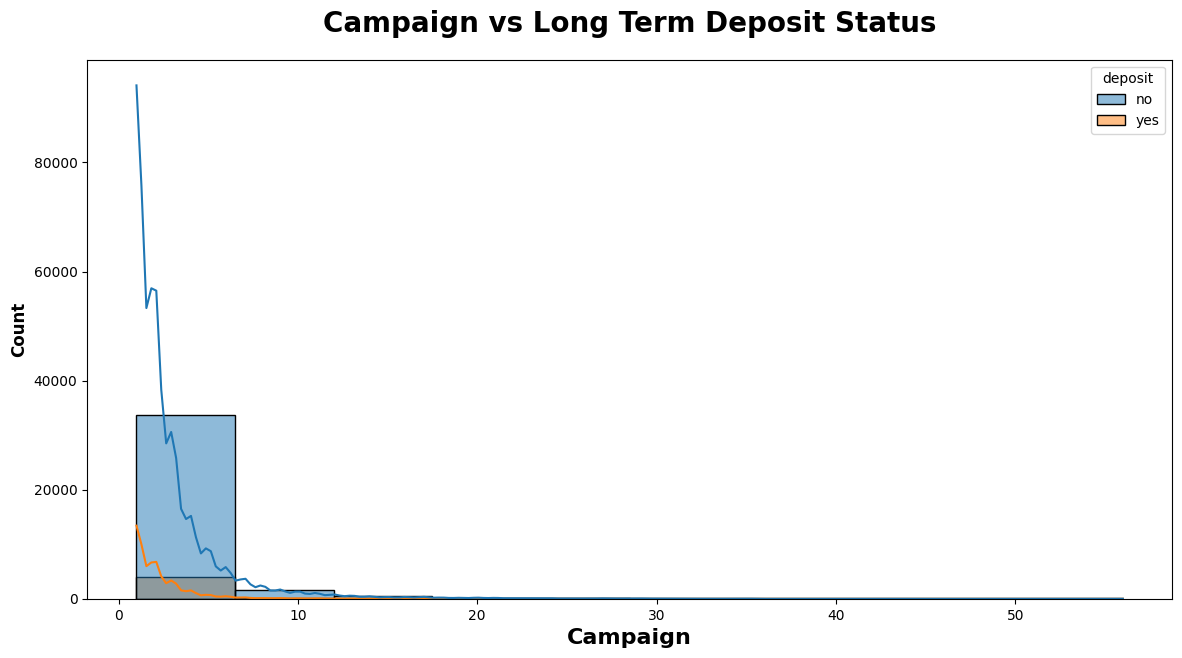

In [61]:
plt.subplots(figsize=(14,7))
sns.histplot(x="campaign",hue="deposit",bins=10 , data=df, kde=True)
plt.title("Campaign vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Campaign", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights :**
- The `campaign` appears to have a right skewed distribution, distinct peaks around 10. This suggests that most observations are concentrated in these ranges of campaign.
The deposits with "no" status are heavily represented in this peaks, particularly in the higher bin (around 10), where there are a significantly large number of "no" deposits.

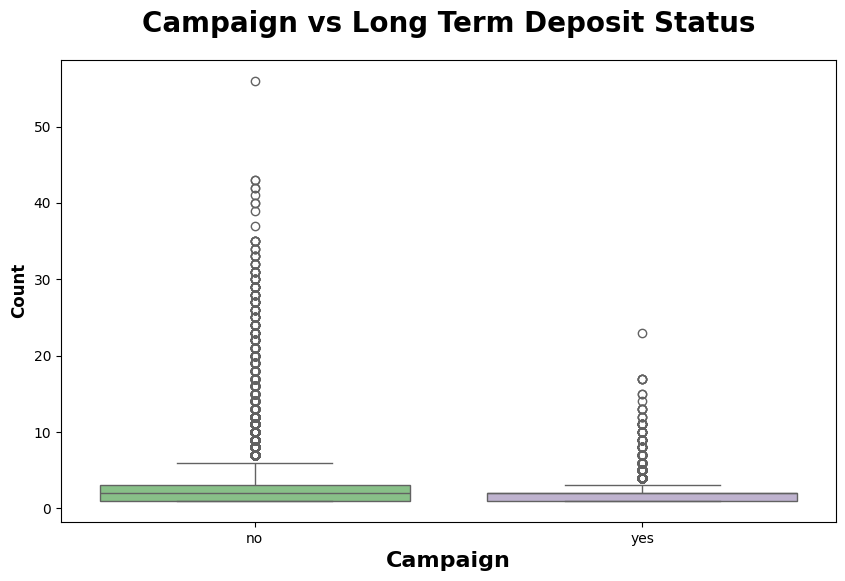

In [62]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="deposit",y='campaign', data=df, palette="Accent")
plt.title("Campaign vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Campaign", weight="bold", fontsize=16)
plt.show()

**Insights**

- The median (horizontal line inside each box) for the "no" deposits is higher than that of the "yes" deposits.
- This suggests that, on average, people who did not make a long-term deposit tend to have experienced higher number of contacts performed during this campaign.

### 4.13 Does pdays has any impact on long term subscription ?

In [63]:
df.groupby('pdays').deposit.value_counts()

pdays  deposit
0      yes            3
       no             3
1      no            17
       yes            5
2      yes           36
       no            23
3      yes          222
       no           119
4      yes           55
       no            51
5      yes           19
       no            17
6      yes          162
       no            85
7      yes           32
       no            20
8      yes            8
       no             5
9      no            20
       yes           18
10     yes           24
       no            17
11     no            13
       yes           11
12     no            28
       yes           16
13     yes           17
       no             7
14     yes            6
       no             6
15     yes           10
       no             6
16     no             1
       yes            1
17     no             1
18     yes            2
21     yes            1
22     yes            1
999    no         35523
       yes         3387
Name: count, dtype: int64

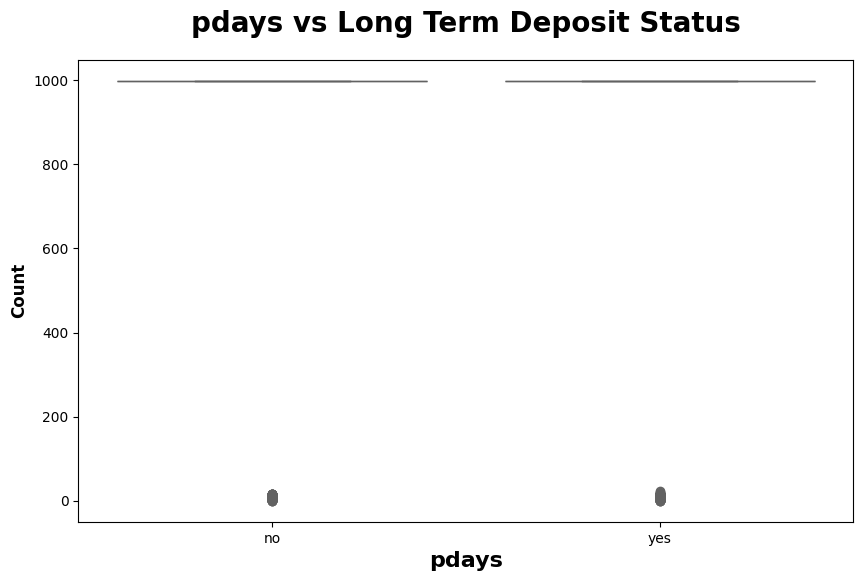

In [64]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="deposit",y='pdays', data=df, palette="Accent")
plt.title("pdays vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("pdays", weight="bold", fontsize=16)
plt.show()

**Insights**
- The median (horizontal line inside each box) is not visible.
- So we have handle outliers in feature engineering.

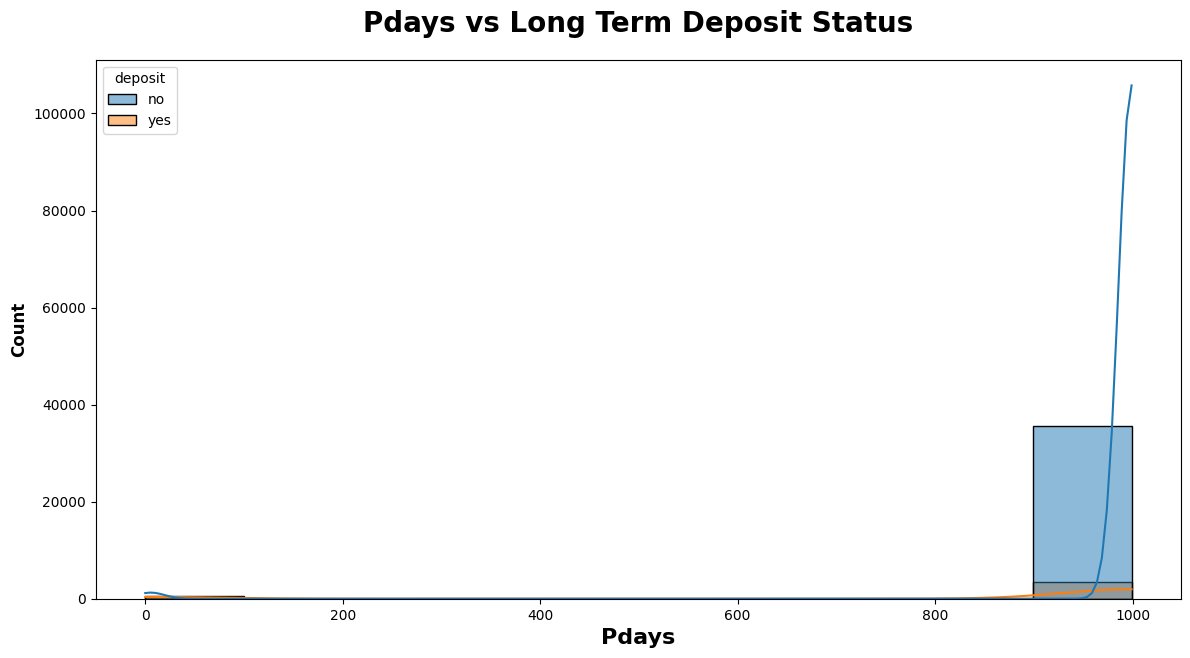

In [65]:
plt.subplots(figsize=(14,7))
sns.histplot(x="pdays",hue="deposit",bins=10 , data=df, kde=True)
plt.title("Pdays vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Pdays", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Report**
- From the above chart of `pdays` we see that the value 999 indicates that the customer had not been previously contacted and the value of value counts of 999 is quite high for both subscription and unsubscriptions.
- Here we say that the variance is quite less so this feature is not important for our analysis .  

### 4.14 Does previous has any impact on long term subscription ?

In [66]:
df.groupby('previous').deposit.value_counts()

previous  deposit
0         no         32144
          yes         2939
1         no          3442
          yes          794
2         no           321
          yes          221
3         yes           58
          no            44
4         yes           18
          no            10
5         yes            6
          no             1
Name: count, dtype: int64

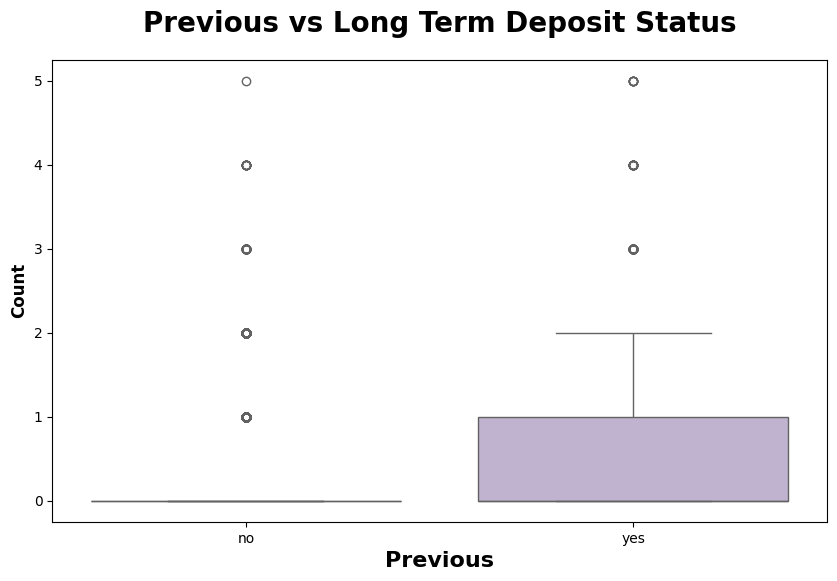

In [105]:
plt.subplots(figsize=(10,6))
sns.boxplot(x="deposit",y='previous', data=df, palette="Accent")
plt.title("Previous vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Previous", weight="bold", fontsize=16)
plt.show()

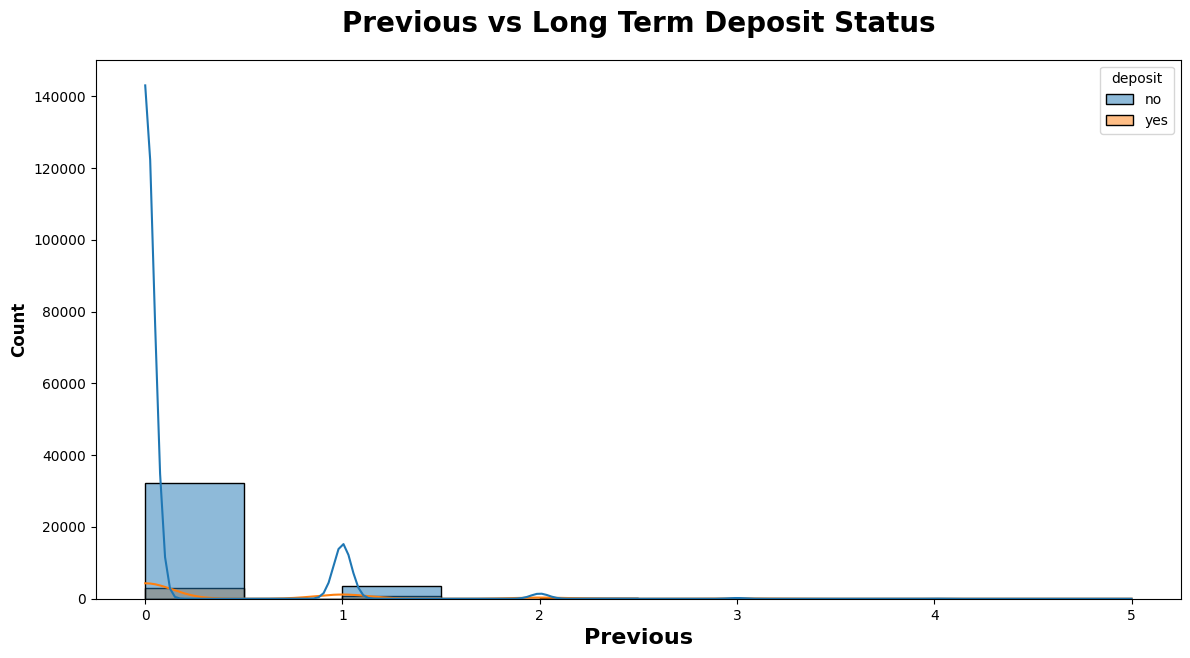

In [106]:
plt.subplots(figsize=(14,7))
sns.histplot(x="previous",hue="deposit",bins=10 , data=df, kde=True)
plt.title("Previous vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Previous", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Report**
- From the above chart of `previous` we see that in 0 time previously contacted customers to client has  95% values of subscription and unsubscription rate . This causes due to very low variance.
- Here we say that this feature is not important for our analysis .  

### 4.15 Does poutcome has any impact on long term subscription ?

In [69]:
#group data by requires_job_training and count case_status
df.groupby('poutcome')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
poutcome    deposit            
failure     no        87.410623
            yes       12.589377
nonexistent no        91.622723
            yes        8.377277
success     yes       60.460460
            no        39.539540

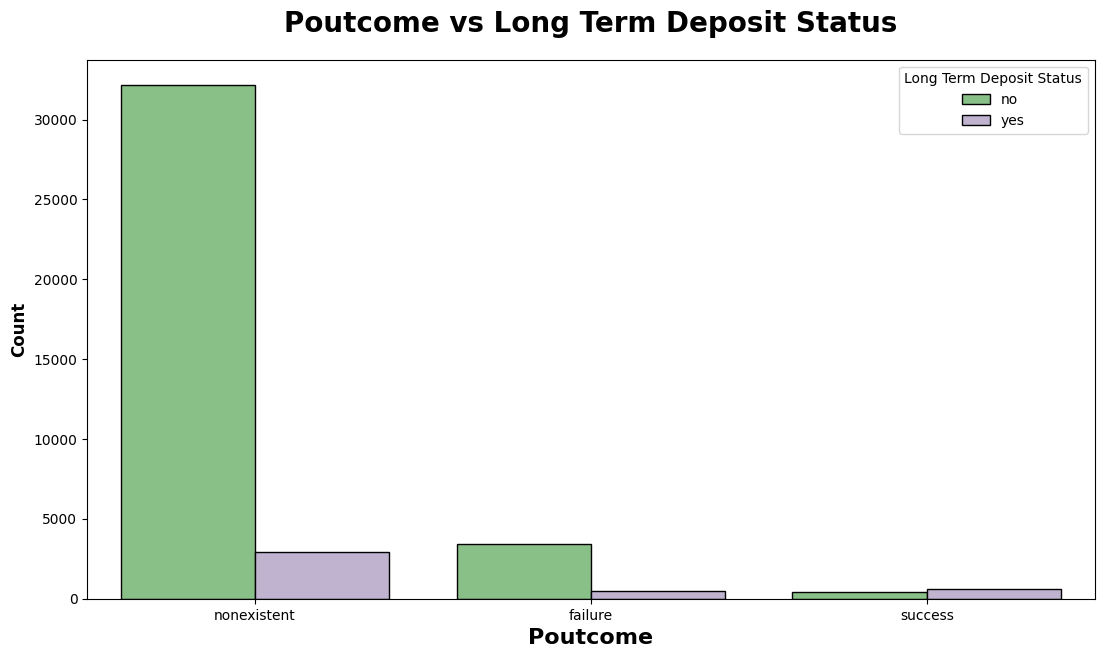

In [70]:
plt.subplots(figsize=(13,7))
sns.countplot(x="poutcome",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Poutcome vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Poutcome", weight="bold", fontsize=16)
plt.legend(title="Long Term Deposit Status", fancybox=True)
plt.show()

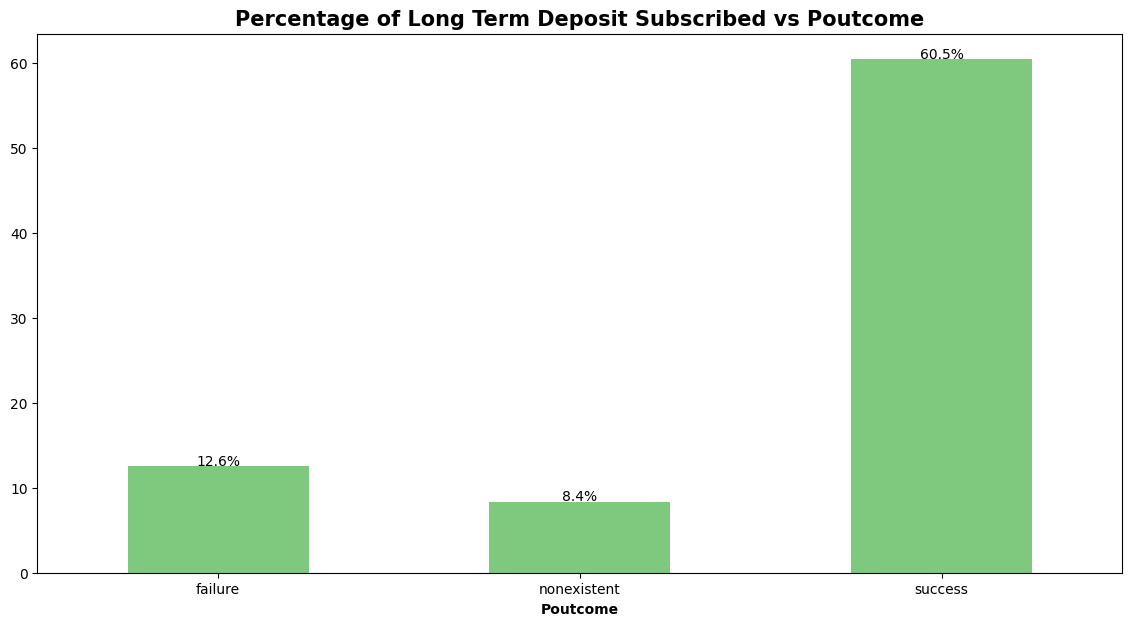

In [71]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['poutcome'].value_counts()/df2['poutcome'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Long Term Deposit Subscribed vs Poutcome" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['poutcome'].value_counts()/df2['poutcome'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Poutcome' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- From the above chart of `poutcome` we see that failure has 12.6% customers subscribed and 87.4% has customers unsbcribed ,in nonexistent has 8.4% customers subscribed and 91.6% has customers unsbcribed ,
success has 60.5% customers subscribed and 39.4% has customers unsbcribed the long term deposit.
-  In  outcome of the previous marketing campaign is non existing the subscriptions rate is less and in  outcome of the previous marketing campaign is success the subscription rate is high

### 4.16 Does emp_var_rate has any impact on long term subscription ?

In [72]:
df.groupby('emp_var_rate').deposit.value_counts()

emp_var_rate  deposit
-3.4          no           617
              yes          454
-3.0          yes           88
              no            84
-2.9          no          1069
              yes          594
-1.8          no          7723
              yes         1461
-1.7          no           118
              yes          100
-0.2          no             9
              yes            1
-0.1          no          3451
              yes          232
 1.1          no          7523
              yes          240
 1.4          no         15368
              yes          866
Name: count, dtype: int64

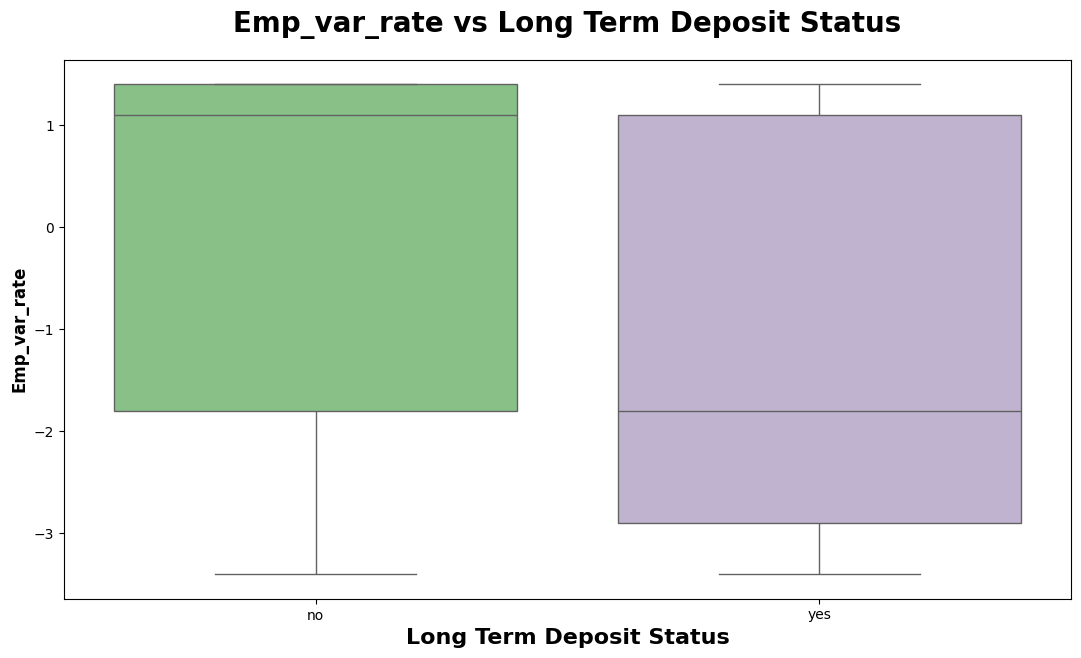

In [73]:

plt.subplots(figsize=(13,7))
sns.boxplot(x="deposit", y="emp_var_rate", data=df, palette="Accent")
plt.title("Emp_var_rate vs Long Term Deposit Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Emp_var_rate", weight="bold", fontsize=12)
plt.xlabel("Long Term Deposit Status", weight="bold", fontsize=16)
plt.show()


**Insights :**
- The median (horizontal line inside each box) for the "no" deposits is higher than that of the "yes" deposits.
- This suggests that, on average, people who did not make a long-term deposit tend to have experienced higher employee variation rate .

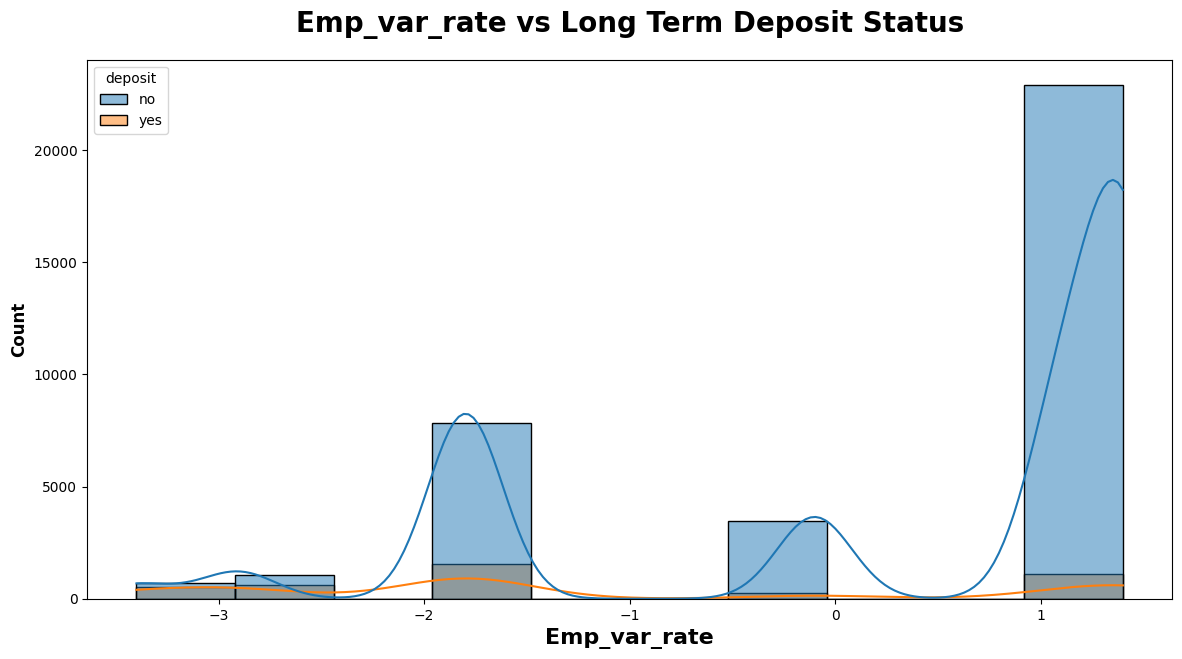

In [74]:
plt.subplots(figsize=(14,7))
sns.histplot(x="emp_var_rate", hue="deposit", bins=10, data=df, kde=True)
plt.title("Emp_var_rate vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Emp_var_rate", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights :**
- The `emp_var_rate` appears to have a multimodal distribution, with three distinct peaks around -2 and 1. This suggests that most observations are concentrated in these ranges of employee variation rate.
The deposits with "no" status are heavily represented in both peaks, particularly in the higher bin (around 1), where there are a significantly large number of "no" deposits.

### 4.17 Does cons_price_idx has any impact on long term subscription ?

In [ ]:

df.groupby('cons_conf_idx').deposit.value_counts()

cons_conf_idx  deposit
-50.0          no          156
               yes         126
-47.1          no         2016
               yes         442
-46.2          no         5270
               yes         524
-45.9          no            9
               yes           1
-42.7          no         6278
               yes         407
-42.0          no         3426
               yes         190
-41.8          no         4186
               yes         188
-40.8          no          451
               yes         264
-40.4          yes          42
               no           25
-40.0          yes         122
               no           90
-39.8          no          118
               yes         100
-36.4          no         7523
               yes         240
-36.1          no         4904
               yes         271
-34.8          yes         150
               no          114
-34.6          yes          97
               no           77
-33.6          no          112
               y

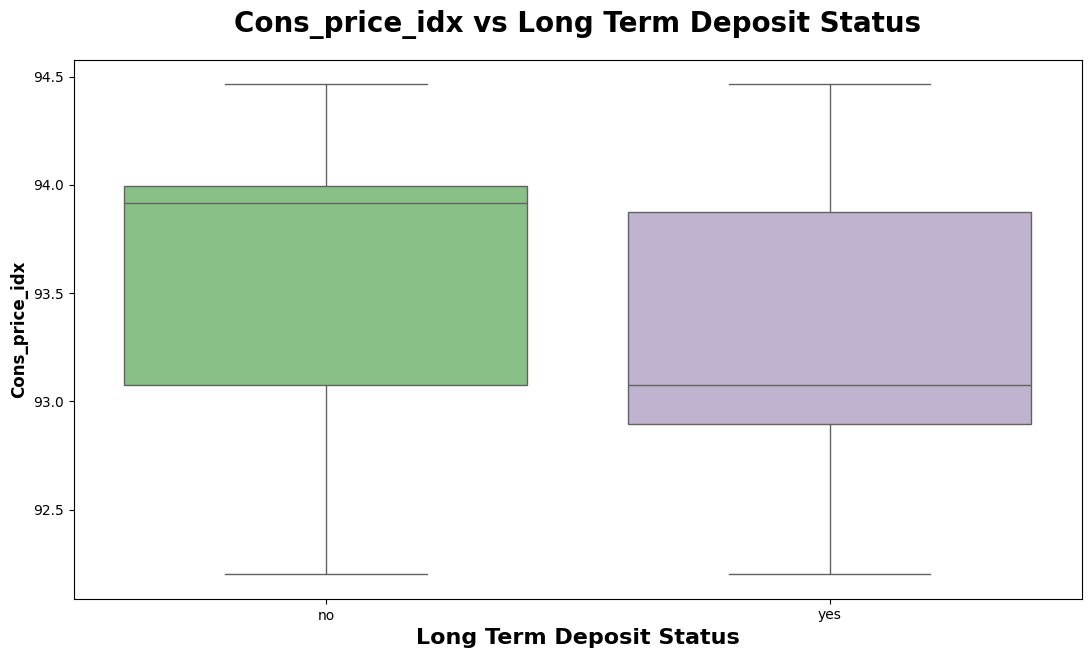

In [76]:
plt.subplots(figsize=(13,7))
sns.boxplot(x="deposit", y="cons_price_idx", data=df, palette="Accent")
plt.title("Cons_price_idx vs Long Term Deposit Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Cons_price_idx", weight="bold", fontsize=12)
plt.xlabel("Long Term Deposit Status", weight="bold", fontsize=16)
plt.show()

**Insights :**
- The median (horizontal line inside each box) for the "no" deposits is higher than that of the "yes" deposits.
- This suggests that, on average, people who did not make a long-term deposit tend to have experienced higher consumer price index values.


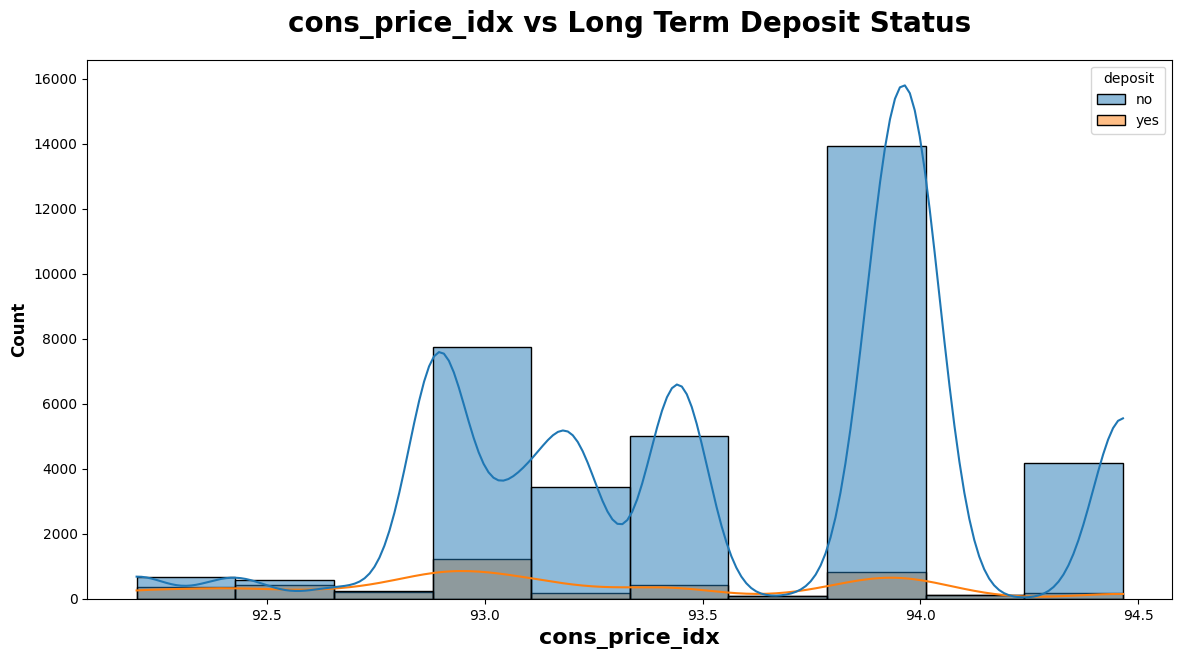

In [77]:
plt.subplots(figsize=(14,7))
sns.histplot(x="cons_price_idx", hue="deposit", bins=10, data=df, kde=True)
plt.title("cons_price_idx vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("cons_price_idx", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights :**
- The `cons_price_idx` appears to have a bimodal distribution, with two distinct peaks around 93.5 and 94.0. This suggests that most observations are concentrated in these ranges of consumer price index values.
The deposits with "no" status are heavily represented in both peaks, particularly in the higher bin (around 94.0), where there are a significantly large number of "no" deposits.

### 4.18 Does cons_conf_idx has any impact on long term subscription ?

In [78]:
df.groupby('cons_conf_idx').deposit.value_counts()

cons_conf_idx  deposit
-50.0          no          156
               yes         126
-47.1          no         2016
               yes         442
-46.2          no         5270
               yes         524
-45.9          no            9
               yes           1
-42.7          no         6278
               yes         407
-42.0          no         3426
               yes         190
-41.8          no         4186
               yes         188
-40.8          no          451
               yes         264
-40.4          yes          42
               no           25
-40.0          yes         122
               no           90
-39.8          no          118
               yes         100
-36.4          no         7523
               yes         240
-36.1          no         4904
               yes         271
-34.8          yes         150
               no          114
-34.6          yes          97
               no           77
-33.6          no          112
               y

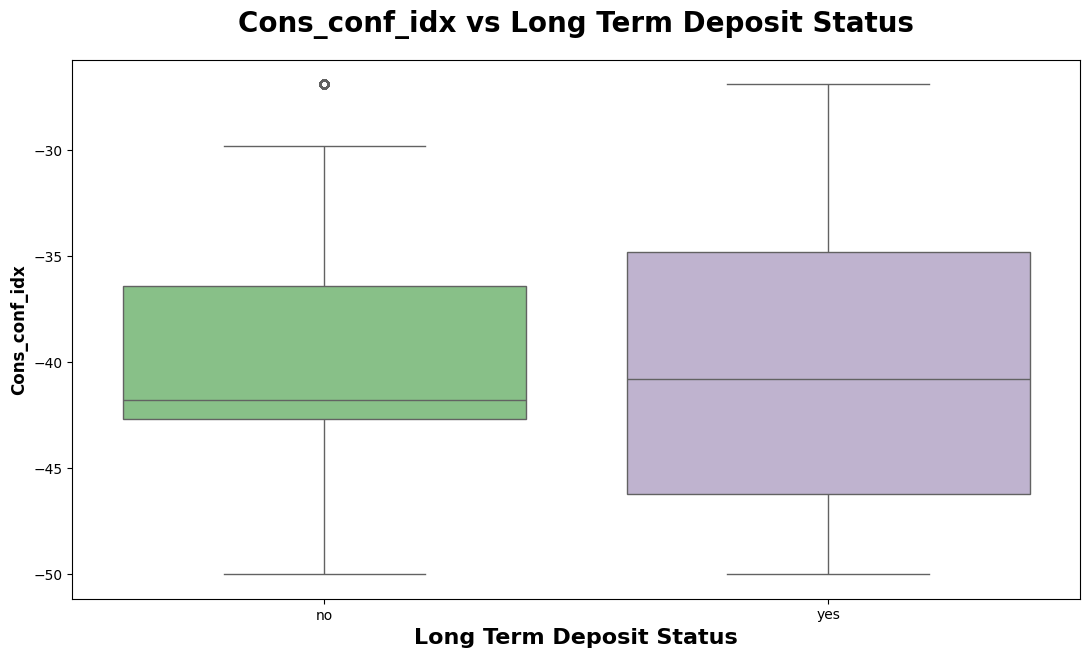

In [79]:
plt.subplots(figsize=(13,7))
sns.boxplot(x="deposit", y="cons_conf_idx", data=df, palette="Accent")
plt.title("Cons_conf_idx vs Long Term Deposit Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Cons_conf_idx", weight="bold", fontsize=12)
plt.xlabel("Long Term Deposit Status", weight="bold", fontsize=16)
plt.show()

**Insights :**
- The median (horizontal line inside each box) for the "no" deposits is higher than that of the "yes" deposits.
- This suggests that, on average, people who did not make a long-term deposit tend to have experienced higher consumer confidence index values.

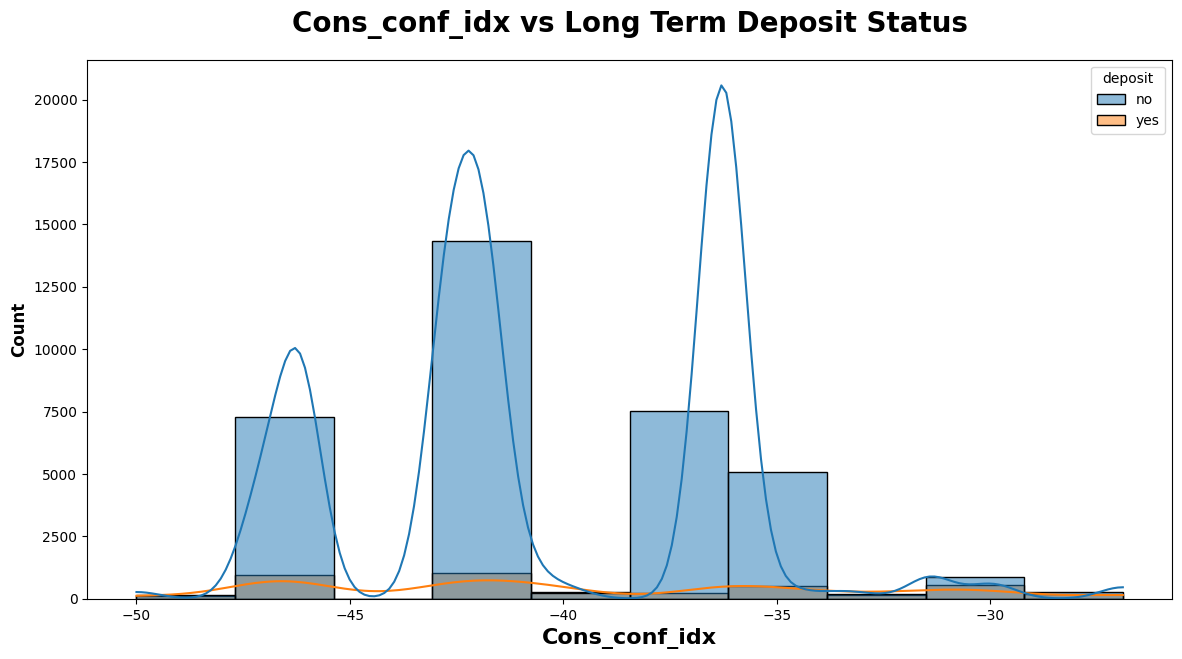

In [80]:
plt.subplots(figsize=(14,7))
sns.histplot(x="cons_conf_idx", hue="deposit", bins=10, data=df, kde=True)
plt.title("Cons_conf_idx vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Cons_conf_idx", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights :**
- The `cons_conf_idx` appears to have a multimodal distribution, with three distinct peaks around -45 and -35. This suggests that most observations are concentrated in these ranges of consumer confidence index values.
The deposits with "no" status are heavily represented in both peaks, particularly in the higher bin (around -35), where there are a significantly large number of "no" deposits.

### 4.19 Does euribor3m has any impact on long term subscription ?

In [81]:
df.groupby('euribor3m').deposit.value_counts()

euribor3m  deposit
0.634      yes         6
           no          2
0.635      yes        22
           no         21
0.636      no         11
                      ..
4.970      yes         4
5.000      no          4
           yes         3
5.045      yes         5
           no          4
Name: count, Length: 487, dtype: int64

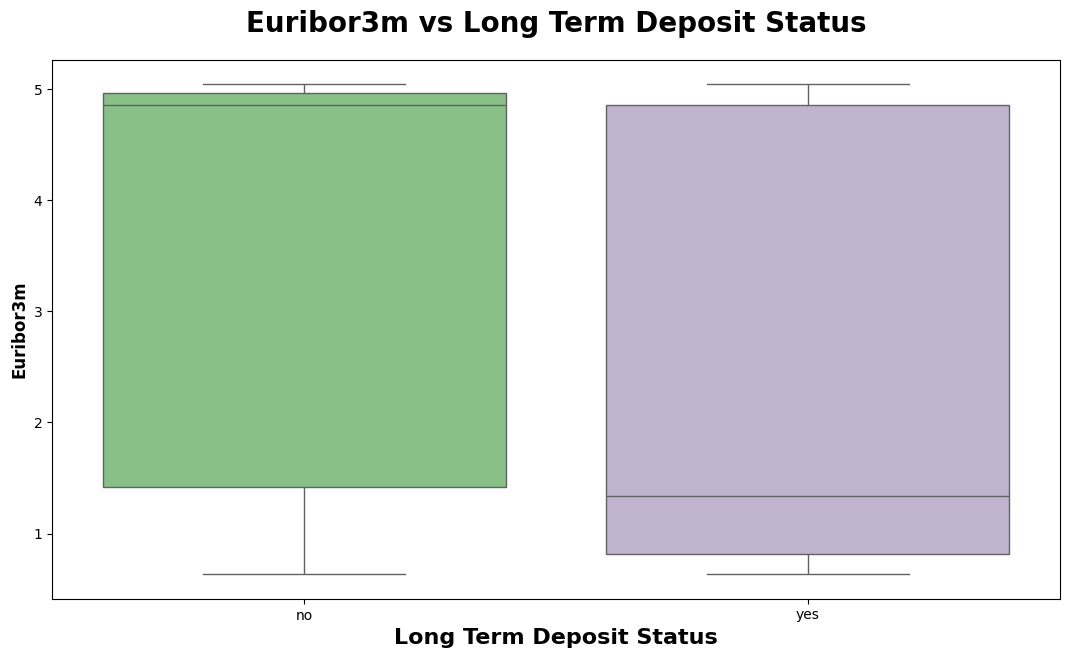

In [82]:
plt.subplots(figsize=(13,7))
sns.boxplot(x="deposit", y="euribor3m", data=df, palette="Accent")
plt.title("Euribor3m vs Long Term Deposit Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Euribor3m", weight="bold", fontsize=12)
plt.xlabel("Long Term Deposit Status", weight="bold", fontsize=16)
plt.show()

**Insights :**
- The median (horizontal line inside each box) for the "no" deposits is higher than that of the "yes" deposits.
- This suggests that, on average, people who did not make a long-term deposit tend to have experienced euribor 3 month rate values.


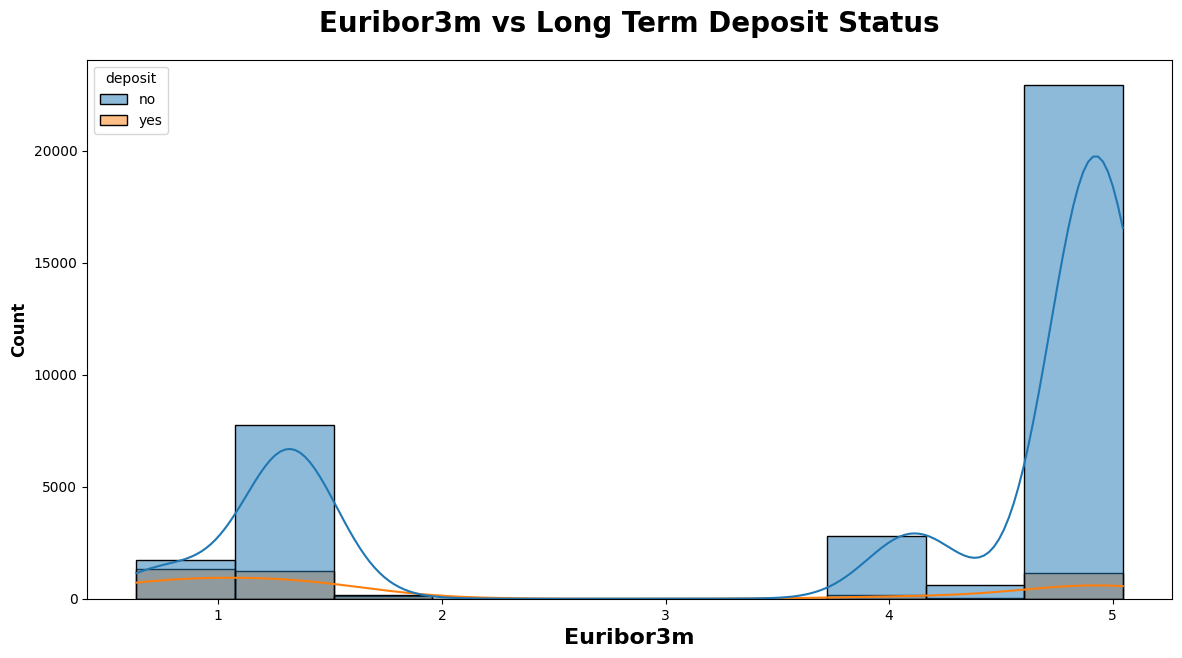

In [83]:
plt.subplots(figsize=(14,7))
sns.histplot(x="euribor3m", hue="deposit", bins=10, data=df, kde=True)
plt.title("Euribor3m vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Euribor3m", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights :**
- The `euribor3m` appears to have a bimodal distribution, with two distinct peaks around 1 and 5. This suggests that most observations are concentrated in these ranges of consumer price index values.
The deposits with "no" status are heavily represented in both peaks, particularly in the higher bin (around 5), where there are a significantly large number of "no" deposits.

### 4.20 Does nr_employed has any impact on long term subscription ?

In [84]:
df.groupby('nr_employed').deposit.value_counts()

nr_employed  deposit
4991.6       no           118
             yes          100
5008.7       yes          369
             no           281
5017.5       no           617
             yes          454
5023.5       yes           88
             no            84
5076.2       no          1069
             yes          594
5099.1       no          7442
             yes         1092
5176.3       no             9
             yes            1
5191.0       no          7523
             yes          240
5195.8       no          3451
             yes          232
5228.1       no         15368
             yes          866
Name: count, dtype: int64

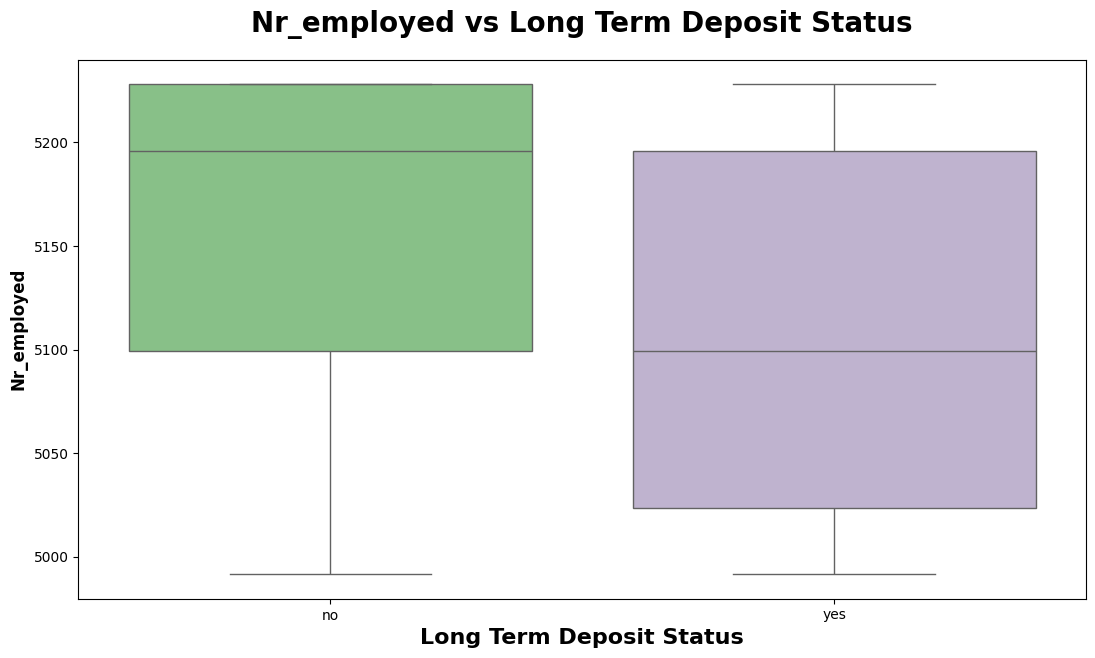

In [85]:
plt.subplots(figsize=(13,7))
sns.boxplot(x="deposit", y="nr_employed", data=df, palette="Accent")
plt.title("Nr_employed vs Long Term Deposit Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Nr_employed", weight="bold", fontsize=12)
plt.xlabel("Long Term Deposit Status", weight="bold", fontsize=16)
plt.show()

**Insights :**
- The median (horizontal line inside each box) for the "no" deposits is higher than that of the "yes" deposits.
- This suggests that, on average, people who did not make a long-term deposit tend to have experienced higher number of employees values.


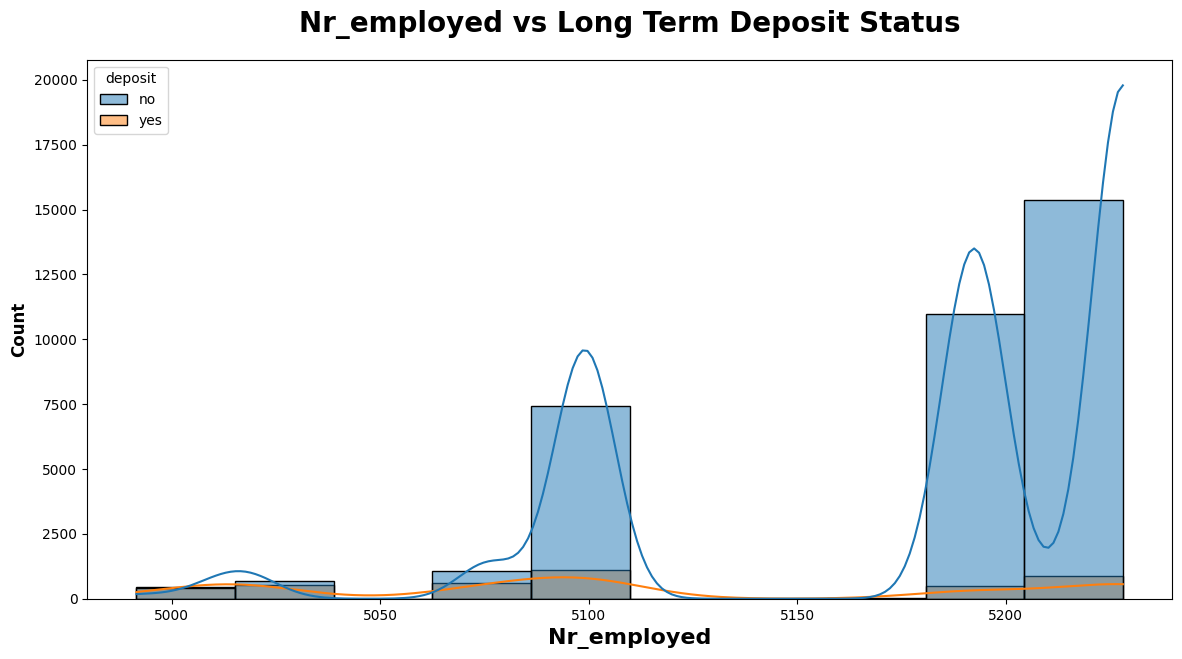

In [86]:
plt.subplots(figsize=(14,7))
sns.histplot(x="nr_employed", hue="deposit", bins=10, data=df, kde=True)
plt.title("Nr_employed vs Long Term Deposit Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Nr_employed", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights :**
- The `nr_employed` appears to have a multimodal distribution, with three distinct peaks around 5100 and 5200. This suggests that most observations are concentrated in these ranges of number of employees values.
The deposits with "no" status are heavily represented in both peaks, particularly in the higher bin (around 5200), where there are a significantly large number of "no" deposits.

## Final Report:

 - `euribor3m`, `nr.employed`, `cons.price.idx` ,`emp_var_rate` columns have multicollinearity , proved in correaltion matrix so we can drop `euribor3m`, `nr.employed`, `cons.price.idx` these 3 columns.
 - `loan`,`default`,`days_of_week`,`housing` columns can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
-  `campaign`,`age`,`duration`,`cons_conf_idx` columns have outllier which should be handled.
-  `pdays`, despite having high variance, seems to have limited predictive power because most values are constant (999). Therefore, it might not be as important.
-  For clients who did not subscribe to a long-term deposit, the value of `previous` is almost always 0.It has very low variance.Therefore, it might not be as important.
-  Target column `deposit` is imbalanced can be handled before model building